In [71]:
import uproot4 as upr
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import particle
import ROOT as r
import math

In [35]:
def get_mass_from_pdgid(pdgid):
    try:
        particle_info = particle.Particle.from_pdgid(pdgid)
        if particle_info is not None:
            return particle_info.mass
        else:
            return np.NaN
    except Exception as e:
        print(f"Error occurred for PDG ID {pdgid}: {e}")
        return np.NaN

def ExpectedNeutronEnergy(row):
    E_mu = row['E']
    p_mu = row['Ptot']
    theta_mu = row['EmissionAngle']
    
    proton_mass = 938.272
    neutron_mass = 939.565
    muon_mass = 105.658
    
    neutrino_energy = (neutron_mass**2 - muon_mass**2 + 2 * proton_mass * E_mu - proton_mass**2) / (2 * (proton_mass - E_mu + p_mu * np.cos(theta_mu)))
    # return neutron_energy - neutron_mass
    return 

def calculate_deviation_angle(row):
    initial_momentum = np.array([row['Px'], row['Py'], row['Pz']])
    entry_direction = np.array([row['ECAL_entry_direction_x'], row['ECAL_entry_direction_y'], row['ECAL_entry_direction_z']])
    
    # Calculate the dot product
    dot_product = np.dot(initial_momentum, entry_direction)
    
    # Calculate the norms of the vectors
    norm_initial = np.linalg.norm(initial_momentum)
    norm_entry = np.linalg.norm(entry_direction)
    
    # Calculate the cosine of the angle
    cos_theta = dot_product / (norm_initial * norm_entry)
    
    # Calculate the angle in radians
    theta = np.arccos(np.clip(cos_theta, -1.0, 1.0))
    
    # Convert the angle to degrees
    # theta_degrees = np.degrees(theta)
    
    return theta

def calculate_deviation_angle2(row):
    initial_momentum = np.array([row['HadronicSyst_Px'], row['HadronicSyst_Py'], row['HadronicSyst_Pz']])
    entry_direction = np.array([row['Expected_HadronicSyst_Px'], row['Expected_HadronicSyst_Py'], row['Expected_HadronicSyst_Pz']])
    
    # Calculate the dot product
    dot_product = np.dot(initial_momentum, entry_direction)
    
    # Calculate the norms of the vectors
    norm_initial = np.linalg.norm(initial_momentum)
    norm_entry = np.linalg.norm(entry_direction)
    
    # Calculate the cosine of the angle
    cos_theta = dot_product / (norm_initial * norm_entry)
    
    # Calculate the angle in radians
    theta = np.arccos(np.clip(cos_theta, -1.0, 1.0))
    
    # Convert the angle to degrees
    # theta_degrees = np.degrees(theta)
    
    return theta
    return theta

def calculate_deviation_angle3(row):
    initial_momentum = np.array([row['Neutrino_Px'], row['Neutrino_Py'], row['Neutrino_Pz']])
    entry_direction = np.array([row['Expected_HadronicSyst_Px'], row['Expected_HadronicSyst_Py'], row['Expected_HadronicSyst_Pz']])
    
    # Calculate the dot product
    dot_product = np.dot(initial_momentum, entry_direction)
    
    # Calculate the norms of the vectors
    norm_initial = np.linalg.norm(initial_momentum)
    norm_entry = np.linalg.norm(entry_direction)
    
    # Calculate the cosine of the angle
    cos_theta = dot_product / (norm_initial * norm_entry)
    
    # Calculate the angle in radians
    theta = np.arccos(np.clip(cos_theta, -1.0, 1.0))
    
    # Convert the angle to degrees
    # theta_degrees = np.degrees(theta)
    
    return theta

In [36]:
tree_genie = upr.open("/storage/gpfs_data/neutrino/users/gi/sand-physics/production_antinumucc/events-in-SANDtracker.0.gtrac.analysed.root")['gtrac_extended']
tree = upr.open("/storage/gpfs_data/neutrino/users/gi/sand-physics/production_antinumucc/events-in-SANDtracker.0.edep-sim.analysed.root")['edep_extended']

In [37]:
df = tree.arrays([
 'FileName',
 'EventId',
 'EventType',
 'CCQEonHydrogen',
 'NofEvents',
 'Interaction_vtxX',
 'Interaction_vtxY',
 'Interaction_vtxZ',
 'Interaction_vtxT',
 'IncomingNeutrinoP4',
#  'InteractionTarget',
 'FinalStateLepton4Momentum',
 'FinalStateLeptonEmissionAngle',
 'FinalStateHadronicSystemTotal4Momentum',
 'FinalStateHadronicSystemEmissionAngle',
 'FinalStateHadronicSystemTotalKinE',
 'NofPrimaries',
 'NofFinalStateChargedParticles',
 'ExpectedNeutrinoP4FromMuon',
 'MissingTransverseMomentum',
 'ExpectedHadronSystP3',
 'ExpectedHadronSystEnergy',
 'ExpectedNeutronArrivalPositionECAL',
 ],library='pd')

 # Flatten the MultiIndex columns
df.columns = ['_'.join(filter(None, col)) for col in df.columns]

# Define the renaming dictionary for the flattened columns
new_columns = {    
    'FileName'                                    : 'FileName',
    'EventId'                                     : 'EventId',
    'EventType'                                   : 'EventType',
    'NofEvents'                                   : 'NofEvents',
    'CCQEonHydrogen'                              : 'CCQEonHydrogen',
    'Interaction_vtxX'                            : 'PrimariesVertexX',
    'Interaction_vtxY'                            : 'PrimariesVertexY',
    'Interaction_vtxZ'                            : 'PrimariesVertexZ',
    'Interaction_vtxT'                            : 'PrimariesVertexT',
    'IncomingNeutrinoP4_fP_fX'                    : 'Neutrino_Px',
    'IncomingNeutrinoP4_fP_fY'                    : 'Neutrino_Py',
    'IncomingNeutrinoP4_fP_fZ'                    : 'Neutrino_Pz',
    'IncomingNeutrinoP4_fE'                       : 'Neutrino_E',
    'FinalStateLepton4Momentum_fP_fX'             : 'Lepton_Px',
    'FinalStateLepton4Momentum_fP_fY'             : 'Lepton_Py',
    'FinalStateLepton4Momentum_fP_fZ'             : 'Lepton_Pz',
    'FinalStateLepton4Momentum_fE'                : 'Lepton_E',
    'FinalStateLeptonEmissionAngle'               : 'Lepton_EmissionAngle',
    'FinalStateHadronicSystemTotal4Momentum_fP_fX': 'HadronicSyst_Px',
    'FinalStateHadronicSystemTotal4Momentum_fP_fY': 'HadronicSyst_Py',
    'FinalStateHadronicSystemTotal4Momentum_fP_fZ': 'HadronicSyst_Pz',
    'FinalStateHadronicSystemTotal4Momentum_fE'   : 'HadronicSyst_E',
    'FinalStateHadronicSystemTotalKinE'           : 'HadronicSyst_KinE',
    'FinalStateHadronicSystemEmissionAngle'       : 'HadronicSyst_EmissionAngle',
    'ExpectedNeutrinoP4FromMuon_fP_fY'            : 'Expected_NuFromMu_Py',
    'ExpectedNeutrinoP4FromMuon_fP_fX'            : 'Expected_NuFromMu_Px',
    'ExpectedNeutrinoP4FromMuon_fP_fZ'            : 'Expected_NuFromMu_Pz',
    'ExpectedNeutrinoP4FromMuon_fE'               : 'Expected_NuFromMu_E',
    'ExpectedHadronSystP3fX'                      : 'Expected_HadronicSyst_Px',
    'ExpectedHadronSystP3fY'                      : 'Expected_HadronicSyst_Py',
    'ExpectedHadronSystP3fZ'                      : 'Expected_HadronicSyst_Pz',
    'ExpectedHadronSystEnergy'                    : 'Expected_HadronicSyst_E',
    'ExpectedNeutronArrivalPositionECALfX'        : 'Expected_NeutronFirstPosECAL_x',
    'ExpectedNeutronArrivalPositionECALfY'        : 'Expected_NeutronFirstPosECAL_y',
    'ExpectedNeutronArrivalPositionECALfZ'        : 'Expected_NeutronFirstPosECAL_z',
    'NofPrimaries': 'NofPrimaries'
}

# Rename the columns
df = df.rename(columns=new_columns)

df["Expected_HadronicSyst_EmissionAngle"] = df[['Neutrino_Px',
                                                'Neutrino_Py',
                                                'Neutrino_Pz',
                                                'Expected_HadronicSyst_Px',
                                                'Expected_HadronicSyst_Py',
                                                'Expected_HadronicSyst_Pz',
                                                ]].apply(calculate_deviation_angle3, axis=1)

df["EmissionAngle_true_expected"] = df[['HadronicSyst_Px',
                                        'HadronicSyst_Py',
                                        'HadronicSyst_Pz',
                                        'Expected_HadronicSyst_Px',
                                        'Expected_HadronicSyst_Py',
                                        'Expected_HadronicSyst_Pz']].apply(calculate_deviation_angle2, axis=1)
 
df

/home/NEUTRINO/gianfrancoingratta/.local/lib/python3.6/site-packages/ipykernel_launcher.py:59: RuntimeWarning: invalid value encountered in double_scalars


,FileName,EventId,EventType,CCQEonHydrogen,NofEvents,PrimariesVertexX,PrimariesVertexY,PrimariesVertexZ,PrimariesVertexT,Neutrino_Px,...,MissingTransverseMomentum,Expected_HadronicSyst_Px,Expected_HadronicSyst_Py,Expected_HadronicSyst_Pz,Expected_HadronicSyst_E,Expected_NeutronFirstPosECAL_x,Expected_NeutronFirstPosECAL_y,Expected_NeutronFirstPosECAL_z,Expected_HadronicSyst_EmissionAngle,EmissionAngle_true_expected
0,events-in-SANDtracker.468.gtrac.root:gRooTrack...,0,RES,0,1,-1.378734,-3.470737,24.888717,8.007961e-09,-0.001472,...,1.129188e-01,0.243467,-0.239248,0.085451,1.003299,-833.324175,-4006.694600,25080.141374,1.256308,1.036609
1,events-in-SANDtracker.468.gtrac.root:gRooTrack...,1,RES,0,1,0.088685,-2.101134,22.888939,1.304080e-09,0.004855,...,4.285020e-01,-0.183317,0.088771,0.034557,0.962014,-1601.403784,-1282.709741,23207.536900,1.448022,1.533354
2,events-in-SANDtracker.468.gtrac.root:gRooTrack...,2,QES,0,1,1.293791,-3.403785,24.016673,5.085320e-09,0.007205,...,1.997582e-01,0.438371,0.262939,0.212823,1.090592,2982.497260,-2390.883110,24836.515967,1.228872,0.372033
3,events-in-SANDtracker.468.gtrac.root:gRooTrack...,7,QES,0,1,0.929595,-1.410350,23.206227,2.367227e-09,0.011844,...,8.482422e-02,0.624394,0.114590,0.358310,1.189191,2618.665137,-1100.367263,24175.502417,1.073117,0.401775
4,events-in-SANDtracker.468.gtrac.root:gRooTrack...,10,DIS,0,1,-0.791197,-3.374041,25.287524,9.345872e-09,0.001384,...,6.265102e-09,-0.188789,-0.302633,0.070785,1.007487,-1023.619486,-3746.620665,25374.668501,1.289399,1.051832
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378748,events-in-SANDtracker.982.gtrac.root:gRooTrack...,983,RES,0,1,0.631549,-2.582814,23.983855,4.975029e-09,0.004386,...,1.359247e-01,-0.085658,0.215670,0.087202,0.971723,-160.424483,-588.785195,24790.103550,1.306664,1.124098
378749,events-in-SANDtracker.982.gtrac.root:gRooTrack...,985,DIS,0,1,0.721796,-1.201266,22.958342,1.536312e-09,0.003473,...,4.503692e-01,-0.628477,0.138682,0.374369,1.198816,-968.925954,-828.185073,23965.464563,1.069012,0.215255
378750,events-in-SANDtracker.982.gtrac.root:gRooTrack...,988,DIS,0,1,-0.192772,-2.156738,23.793097,4.335122e-09,-0.001881,...,3.071404e-01,0.523344,-0.196245,0.304549,1.134875,1497.420850,-2790.530860,24776.669270,1.039575,0.927519
378751,events-in-SANDtracker.982.gtrac.root:gRooTrack...,991,DIS,0,1,0.537334,-1.840952,25.444034,9.869543e-09,-0.002268,...,4.663344e-02,0.004230,-0.169484,0.010751,0.954803,579.435156,-3527.956759,25551.046184,1.407179,1.298988


In [41]:
new_columns = {
    ('EventType','','')                   : 'EventType',
    ('FileName','','')                    : 'FileName',
    ('EventId','','')                     : 'EventId',
    ('CCQEonHydrogen','','')              : 'CCQEonHydrogen',
    ('PrimariesPDG','','')                : 'PDG',
    ('PrimariesTrackId','','')            : 'TrackId',
    ('PrimariesP4', 'fP', 'fX')           : 'Px',
    ('PrimariesP4', 'fP', 'fY')           : 'Py',
    ('PrimariesP4', 'fP', 'fZ')           : 'Pz',
    ('PrimariesP4', 'fE', '')             : 'E',
    ('PrimariesFirstHitECAL', 'fP', 'fX') : 'FirstHitECAL_X',
    ('PrimariesFirstHitECAL', 'fP', 'fY') : 'FirstHitECAL_Y',
    ('PrimariesFirstHitECAL', 'fP', 'fZ') : 'FirstHitECAL_Z',
    ('PrimariesFirstHitECAL', 'fE', '')   : 'FirstHitECAL_T',
    ('PrimariesEmissionAngle', '', '')    : 'EmissionAngle',
    ('PrimariesEDepECAL', '', '')         : 'EDepECAL',
    ('PrimariesFirstTimeECAL', '', '')    : 'FirstTimeECAL',
}

primaries = tree.arrays([
'EventType',
'FileName',
'EventId',
'CCQEonHydrogen',
'PrimariesPDG',
'PrimariesTrackId',
'PrimariesP4',
'PrimariesEmissionAngle',
'PrimariesFirstHitECAL',
'PrimariesEDepECAL',
 ],library='pd').rename(columns=new_columns)

primaries = primaries.set_index([
                    'FileName',
                    'EventId',
                    'EventType',
                    'CCQEonHydrogen',
                    ], append=True).reorder_levels([
                                                            'entry',
                                                            'subentry',
                                                            'FileName',
                                                            'EventId',
                                                            'EventType',
                                                            'CCQEonHydrogen'
                                                            ])
primaries["mass"] = primaries['PDG'].apply(get_mass_from_pdgid)
primaries["Ptot"] = np.sqrt(primaries["Px"]**2 + primaries["Py"]**2 + primaries["Pz"]**2)
primaries["E_kin"] = primaries['E'] - primaries['mass']
primaries["gamma"] = primaries['E'] / (primaries["mass"])
primaries["beta"] =np.sqrt(1. - 1. / primaries["gamma"].values**2)
vertices = df[['FileName','EventId','CCQEonHydrogen','PrimariesVertexX','PrimariesVertexY','PrimariesVertexZ']].set_index(['FileName','EventId'])
primaries = primaries.join(vertices).rename(columns = {"PrimariesVertexX":"EvtVtxX", "PrimariesVertexY":"EvtVtxY", "PrimariesVertexZ":"EvtVtxZ"})
primaries['dist_Vtx2ECAL'] = np.sqrt((primaries['FirstHitECAL_X'] - primaries['EvtVtxX']*1e3)**2 + (primaries['FirstHitECAL_Y'] - primaries['EvtVtxY']*1e3)**2 + (primaries['FirstHitECAL_Z'] - primaries['EvtVtxZ']*1e3)**2)
primaries

/home/NEUTRINO/gianfrancoingratta/.local/lib/python3.6/site-packages/ipykernel_launcher.py:51: RuntimeWarning: invalid value encountered in sqrt


PDG  \
FileName                                           EventId subentry EventType entry  CCQEonHydrogen         
events-in-SANDtracker.0.gtrac.root:gRooTracker:10  10      0        DIS       587    0                -13   
                                                           1        DIS       587    0               2112   
                                                           2        DIS       587    0               -211   
                                                           3        DIS       587    0               2212   
                                                           4        DIS       587    0                111   
...                                                                                                   ...   
events-in-SANDtracker.998.gtrac.root:gRooTracke... 993     2        QES       377943 0               2212   
                                                           3        QES       377943 0               2112   
                                                           4        QES       377943 0               2112   
                                                           5        QES       377943 0               2112   
                                                           6        QES       377943 0               2112   

                                                                                                     TrackId  \
FileName                                           EventId subentry EventType entry  CCQEonHydrogen            
events-in-SANDtracker.0.gtrac.root:gRooTracker:10  10      0        DIS       587    0                     0   
                                                           1        DIS       587    0                     1   
                                                           2        DIS       587    0                     2   
                                                           3        DIS       587    0                     3   
                                                           4        DIS       587    0                     4   
...                                                                                                      ...   
events-in-SANDtracker.998.gtrac.root:gRooTracke... 993     2        QES       377943 0                     2   
                                                           3        QES       377943 0                     3   
                                                           4        QES       377943 0                     4   
                                                           5        QES       377943 0                     5   
                                                           6        QES       377943 0                     6   

                                                                                                             Px  \
FileName                                           EventId subentry EventType entry  CCQEonHydrogen               
events-in-SANDtracker.0.gtrac.root:gRooTracker:10  10      0        DIS       587    0               356.507726   
                                                           1        DIS       587    0               -16.295592   
                                                           2        DIS       587    0              -158.944288   
                                                           3        DIS       587    0              -123.681233   
                                                           4        DIS       587    0              -429.192711   
...                                                                                                         ...   
events-in-SANDtracker.998.gtrac.root:gRooTracke... 993     2        QES       377943 0               104.075992   
                                                           3        QES       377943 0              -158.745273   
                                                           4        QES      

Text(0.5, 0.98, '$\\overline{\\nu}_\\mu$ vertex position')

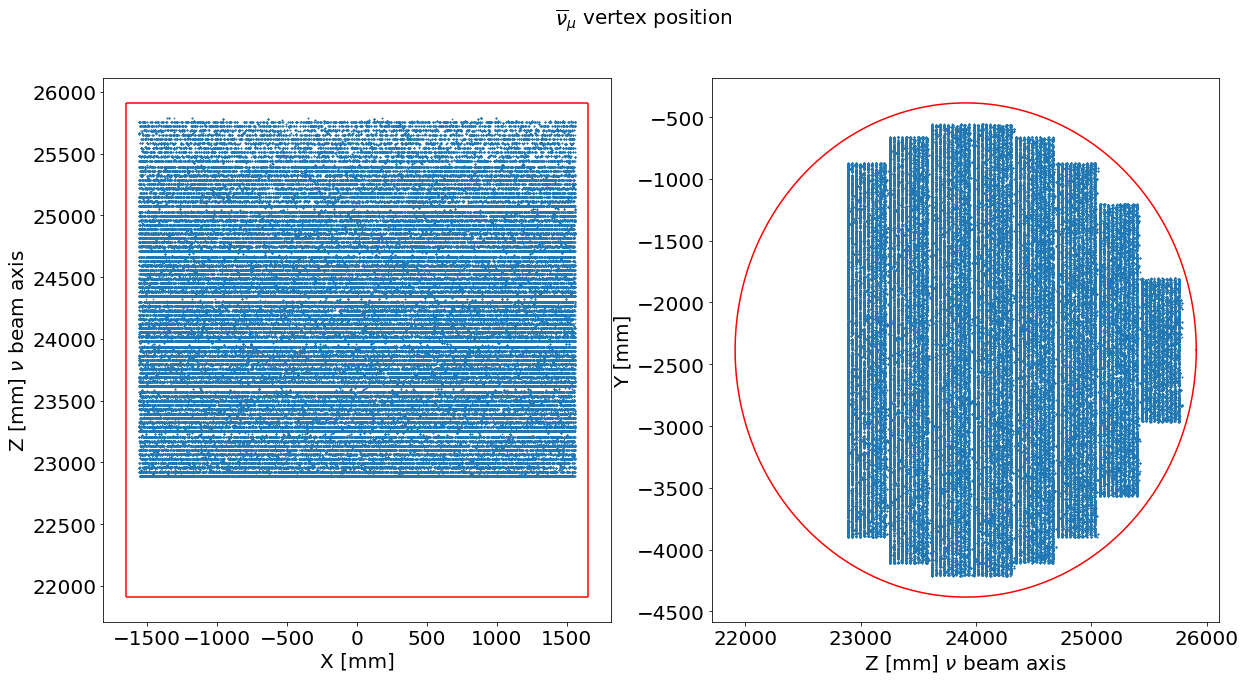

In [7]:
sand_center = [0, -2384.73, 23910]
sand_radius = 2000
theta = np.linspace(0, 2*np.pi, 100000)
z_sand = sand_center[2] + sand_radius * np.cos(theta)
y_sand = sand_center[1] + sand_radius * np.sin(theta)

fig, ax = plt.subplots(1,2,figsize=(20,10))

ax[0].scatter(x = df["PrimariesVertexX"]*1e3, y = df["PrimariesVertexZ"]*1e3, s = 0.5)
ax[1].scatter(x = df["PrimariesVertexZ"]*1e3, y = df["PrimariesVertexY"]*1e3, s = 0.5)

ax[0].vlines(-1650, sand_center[2] - sand_radius, sand_center[2] + sand_radius, color='red', label='SAND')
ax[0].vlines(+1650, sand_center[2] - sand_radius, sand_center[2] + sand_radius, color='red')
ax[0].hlines(sand_center[2] - sand_radius, -1650, 1650, color='red')
ax[0].hlines(sand_center[2] + sand_radius, -1650, 1650, color='red')
ax[1].plot(z_sand, y_sand, linestyle='-', color='red', label = 'SAND')

ax[0].set_xlabel("X [mm]", fontsize=20)
ax[0].set_ylabel(r"Z [mm] $\nu$ beam axis", fontsize=20)
ax[0].tick_params(labelsize=20)
ax[1].set_xlabel(r"Z [mm] $\nu$ beam axis", fontsize=20)
ax[1].set_ylabel("Y [mm]", fontsize=20)
ax[1].tick_params(labelsize=20)

plt.suptitle(r"$\overline{\nu}_\mu$ vertex position", fontsize=20)

In [10]:
# !!! PRIMARIES WITH AT LEAST ONE HIT IN ECAL
primaries_ = primaries[primaries.FirstHitECAL_T!=0]
primaries_signal = primaries_[primaries_.index.get_level_values(4)==True]
primaries_bkg = primaries_[primaries_.index.get_level_values(4)==False]

/home/NEUTRINO/gianfrancoingratta/.local/lib/python3.6/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


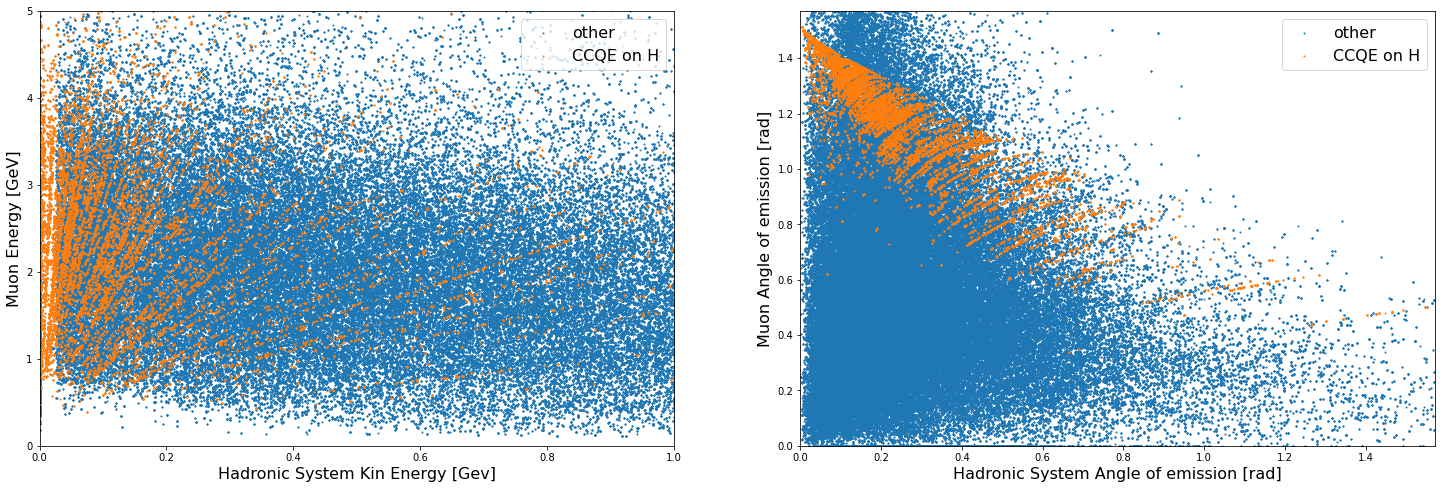

In [21]:
fig, ax = plt.subplots(1,2,figsize=(25,8))

ax[0].scatter(x = df[df.CCQEonHydrogen==0]['HadronicSyst_KinE'], 
                y = df[df.CCQEonHydrogen==0]['Lepton_E'],
                label = 'other',
                s=1)

ax[0].scatter(x = df[df.CCQEonHydrogen==1]['HadronicSyst_KinE'], 
                y = df[df.CCQEonHydrogen==1]['Lepton_E'],
               label = 'CCQE on H',
               s = 1)

# ax[0].scatter(x = df[df.CCQEonHydrogen==1]['Expected_HadronicSyst_E'] - 0.939565, 
#                 y = df[df.CCQEonHydrogen==1]['Lepton_E'],
#                label = 'expected from CCQE on H',
#                s = 1)

ax[1].scatter(x = df[df.CCQEonHydrogen==0]['Lepton_EmissionAngle'], 
                y = df[df.CCQEonHydrogen==0]['HadronicSyst_EmissionAngle'],
                label = 'other',
                s=1)

ax[1].scatter(x = df[df.CCQEonHydrogen==1]['Lepton_EmissionAngle'], 
                y = df[df.CCQEonHydrogen==1]['HadronicSyst_EmissionAngle'],
                label = 'CCQE on H',
                s=1)

ax[0].set_xlabel('Hadronic System Kin Energy [Gev]', fontsize=16)
ax[0].set_ylabel('Muon Energy [GeV]', fontsize=16)
ax[0].set_xlim([0,1])
ax[0].set_ylim([0,5])
ax[0].legend(fontsize=16)

ax[1].set_xlabel('Hadronic System Angle of emission [rad]', fontsize=16)
ax[1].set_ylabel('Muon Angle of emission [rad]', fontsize=16)
ax[1].set_xlim([0,np.pi/2.])
ax[1].set_ylim([0,np.pi/2.])
ax[1].legend(fontsize=16)

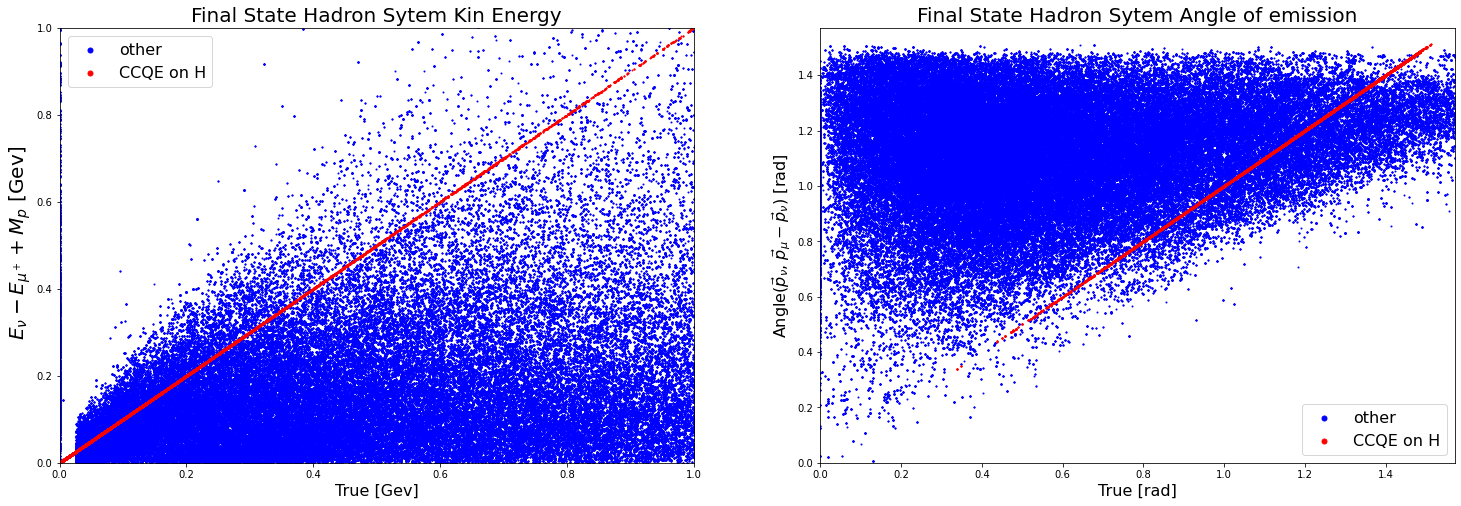

In [12]:
fig, ax = plt.subplots(1, 2, figsize=(25, 8))

ax[0].scatter(x = df[df.CCQEonHydrogen == 0]['HadronicSyst_KinE'],
              y = df[df.CCQEonHydrogen == 0]['Expected_HadronicSyst_E'] - 0.939565,
              s=1, color='blue', label='other')

ax[0].scatter(x = df[df.CCQEonHydrogen == 1]['HadronicSyst_KinE'],
              y = df[df.CCQEonHydrogen == 1]['Expected_HadronicSyst_E'] - 0.939565,
              s=1, color='red', label='CCQE on H')

ax[1].scatter(x = df[df.CCQEonHydrogen == 0]['HadronicSyst_EmissionAngle'],
              y = df[df.CCQEonHydrogen == 0]['Expected_HadronicSyst_EmissionAngle'],
              s=1, color='blue', label='other')

ax[1].scatter(x = df[df.CCQEonHydrogen == 1]['HadronicSyst_EmissionAngle'],
              y = df[df.CCQEonHydrogen == 1]['Expected_HadronicSyst_EmissionAngle'],
              s=1, color='red', label='CCQE on H')

ax[0].set_title('Final State Hadron Sytem Kin Energy', fontsize=20)
ax[0].set_xlabel('True [Gev]', fontsize=16)
ax[0].set_ylabel(r' $E_\nu - E_{\mu^+} + M_p$ [Gev]', fontsize=20)
ax[0].set_xlim([0,1])
ax[0].set_ylim([0,1])
ax[0].legend(markerscale=5, loc='upper left',fontsize=16)

ax[1].set_title('Final State Hadron Sytem Angle of emission', fontsize=20)
ax[1].set_xlabel('True [rad]', fontsize=16)
ax[1].set_ylabel(r'Angle($\vec{p}_\nu$, $\vec{p}_\mu - \vec{p}_\nu$) [rad]', fontsize=16)
ax[1].set_xlim([0,np.pi/2.])
ax[1].set_ylim([0,np.pi/2.])
ax[1].legend(markerscale=5, loc='lower right',fontsize=16)

<AxesSubplot:xlabel='EmissionAngle_true_expected', ylabel='Probability'>

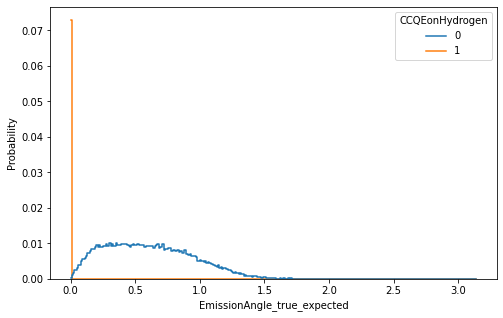

In [14]:
fig, ax = plt.subplots(figsize=(8,5))

sns.histplot(data= df, x = "EmissionAngle_true_expected",
              element='step', fill=False, hue='CCQEonHydrogen', stat='probability', bins=np.arange(0,np.pi,0.01))

Text(0.5, 0.98, 'First Hit in ECAL position')

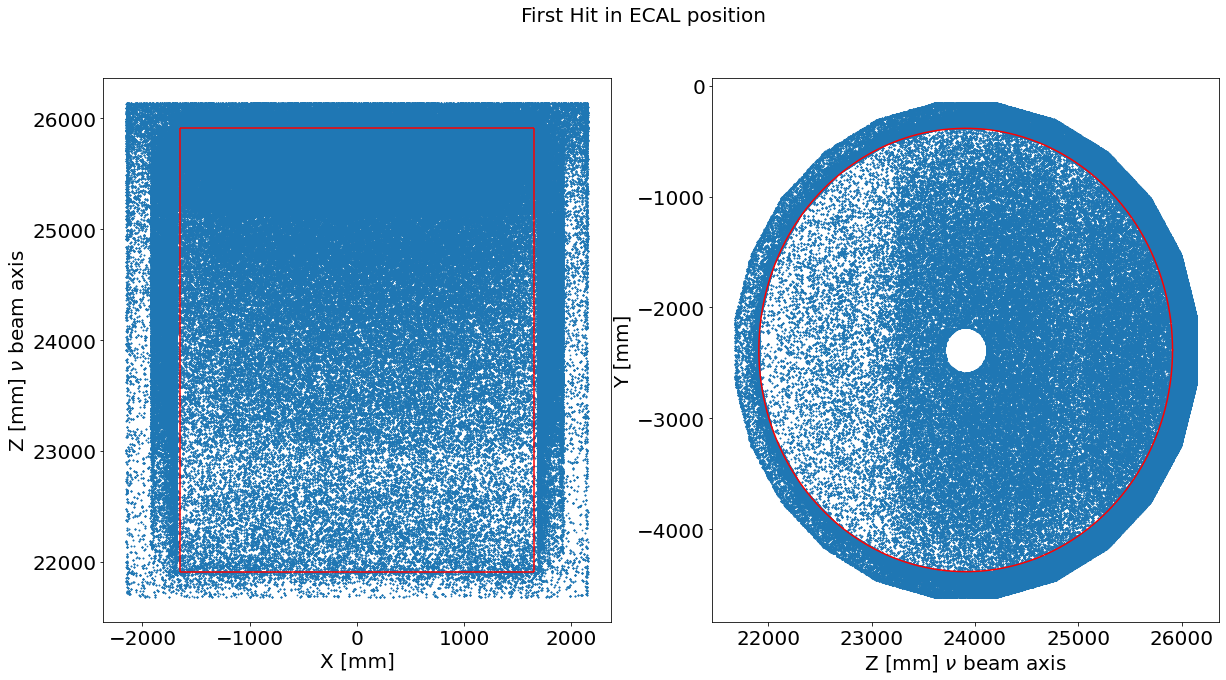

In [104]:
sand_center = [0, -2384.73, 23910]
sand_radius = 2000
theta = np.linspace(0, 2*np.pi, 100000)
z_sand = sand_center[2] + sand_radius * np.cos(theta)
y_sand = sand_center[1] + sand_radius * np.sin(theta)

fig, ax = plt.subplots(1,2,figsize=(20,10))

ax[0].scatter(x = primaries_["FirstHitECAL_X"], y = primaries_["FirstHitECAL_Z"], s = 0.5)
ax[1].scatter(x = primaries_["FirstHitECAL_Z"], y = primaries_["FirstHitECAL_Y"], s = 0.5)

ax[0].vlines(-1650, sand_center[2] - sand_radius, sand_center[2] + sand_radius, color='red', label='SAND')
ax[0].vlines(+1650, sand_center[2] - sand_radius, sand_center[2] + sand_radius, color='red')
ax[0].hlines(sand_center[2] - sand_radius, -1650, 1650, color='red')
ax[0].hlines(sand_center[2] + sand_radius, -1650, 1650, color='red')
ax[1].plot(z_sand, y_sand, linestyle='-', color='red', label = 'SAND')

ax[0].set_xlabel("X [mm]", fontsize=20)
ax[0].set_ylabel(r"Z [mm] $\nu$ beam axis", fontsize=20)
ax[0].tick_params(labelsize=20)
ax[1].set_xlabel(r"Z [mm] $\nu$ beam axis", fontsize=20)
ax[1].set_ylabel("Y [mm]", fontsize=20)
ax[1].tick_params(labelsize=20)

plt.suptitle("First Hit in ECAL position", fontsize=20)

(0.0, 50.0)

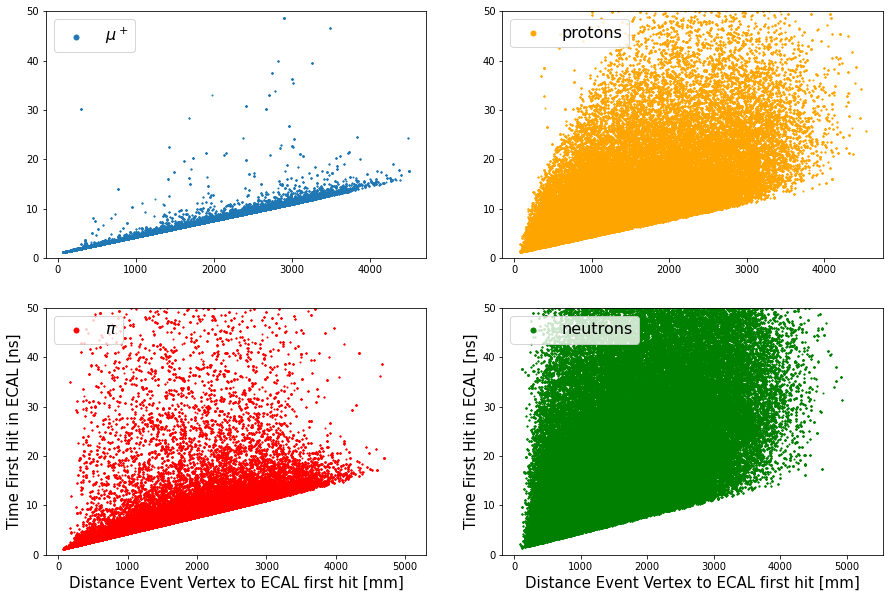

In [99]:
fig,ax = plt.subplots(2,2,figsize=(15,10))

# sns.scatterplot(data=primaries, x='dist_Vtx2ECAL', y='FirstTimeECAL', s=1, hue='PDG')
ax[0,0].scatter(x = primaries_[primaries_.PDG==-13]['dist_Vtx2ECAL'], 
           y = primaries_[primaries_.PDG==-13]['FirstHitECAL_T'], 
           label = r'$\mu^+$', s=1)

ax[1,0].scatter(x = primaries_[(primaries_.PDG==211)|(primaries_.PDG==-211)|(primaries_.PDG==111)]['dist_Vtx2ECAL'], 
           y = primaries_[(primaries_.PDG==211)|(primaries_.PDG==-211)|(primaries_.PDG==111)]['FirstHitECAL_T'], 
           label = r'$\pi$', s=1, color='red')

ax[0,1].scatter(x = primaries_[(primaries_.PDG==2212)|(primaries_.PDG==-2212)]['dist_Vtx2ECAL'], 
           y = primaries_[(primaries_.PDG==2212)|(primaries_.PDG==-2212)]['FirstHitECAL_T'], 
           label = 'protons', s=1, color='orange')

ax[1,1].scatter(x = primaries_[(primaries_.PDG==2112)|(primaries_.PDG==-2112)]['dist_Vtx2ECAL'], 
           y = primaries_[(primaries_.PDG==2112)|(primaries_.PDG==-2112)]['FirstHitECAL_T'], 
           label = 'neutrons', s=1, color='green')

ax[0,0].legend(markerscale=5, loc='upper left',fontsize=16)
ax[0,1].legend(markerscale=5, loc='upper left',fontsize=16)
ax[1,0].legend(markerscale=5, loc='upper left',fontsize=16)
ax[1,1].legend(markerscale=5, loc='upper left',fontsize=16)

ax[1,0].set_xlabel("Distance Event Vertex to ECAL first hit [mm]", fontsize=15)
ax[1,0].set_ylabel("Time First Hit in ECAL [ns]", fontsize=15)

ax[1,1].set_xlabel("Distance Event Vertex to ECAL first hit [mm]", fontsize=15)
ax[1,1].set_ylabel("Time First Hit in ECAL [ns]", fontsize=15)

ax[0,0].set_ylim([0,50])

ax[0,1].set_ylim([0,50])

ax[1,0].set_ylim([0,50])

ax[1,1].set_ylim([0,50])


Text(0.5, 0.98, 'Time of First Hit in ECAL')

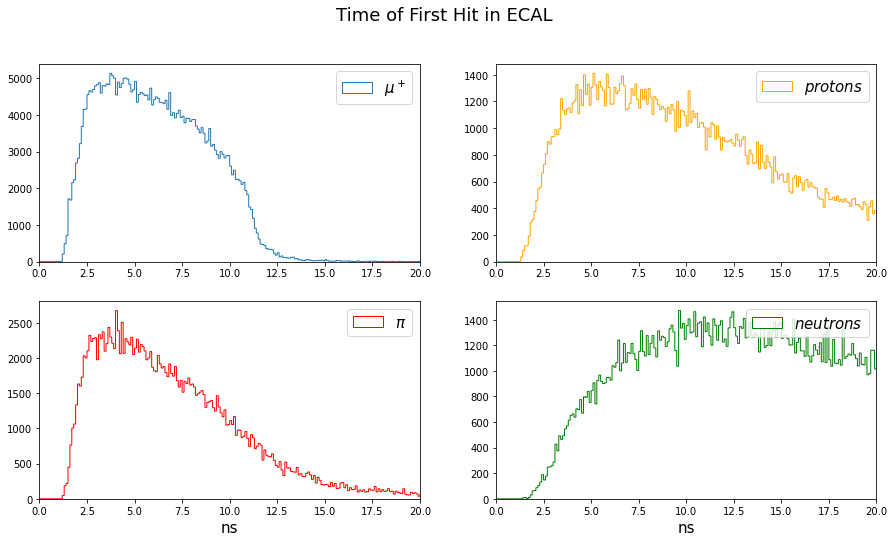

In [103]:
fig, ax = plt.subplots(2,2,figsize=(15,8))

ax[0,0].hist(x = primaries_[primaries_.PDG==-13]['FirstHitECAL_T'], label=r'$\mu^+$',
        histtype='step', bins=np.arange(0, 1000, 0.1))

ax[1,0].hist(x = primaries_[(primaries_.PDG==111) | (primaries_.PDG==211) | (primaries_.PDG==-211)]['FirstHitECAL_T'], label=r'$\pi$',
        histtype='step', bins=np.arange(0, 1000, 0.1), color='red')

ax[0,1].hist(x = primaries_[primaries_.PDG==2212]['FirstHitECAL_T'], label=r'$protons$',
        histtype='step', bins=np.arange(0, 1000, 0.1), color='orange')

ax[1,1].hist(x = primaries_[primaries_.PDG==2112]['FirstHitECAL_T'], label=r'$neutrons$',
        histtype='step', bins=np.arange(0, 1000, 0.1), color='green')

# ax.set_yscale('log')
ax[0,0].legend(fontsize=15)
ax[0,0].set_xlim(0,20)

ax[0,1].legend(fontsize=15)
ax[0,1].set_xlim(0,20)

ax[1,0].legend(fontsize=15)
ax[1,0].set_xlim(0,20)
ax[1,0].set_xlabel("ns", fontsize=15)

ax[1,1].legend(fontsize=15)
ax[1,1].set_xlim(0,20)
ax[1,1].set_xlabel("ns", fontsize=15)


plt.suptitle("Time of First Hit in ECAL", fontsize=18)
# ax.set_xlim(0,20)


Text(0.5, 0.98, 'beta relativistic primaries')

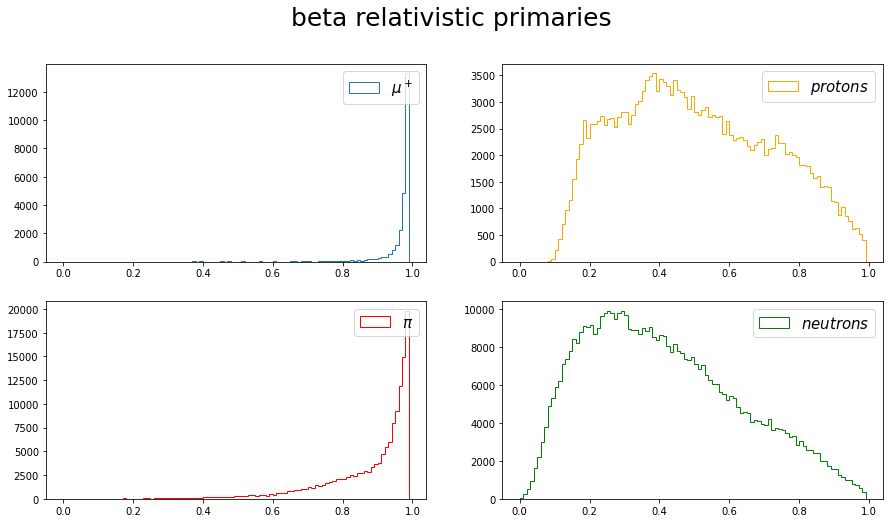

In [100]:
fig, ax = plt.subplots(2,2,figsize=(15,8))

ax[0,0].hist(x = primaries_[primaries_.PDG==-13]['beta'], label=r'$\mu^+$',
        histtype='step', 
        bins=np.arange(0, 1, 0.01)
        )

ax[0,1].hist(x = primaries_[primaries_.PDG==2212]['beta'], label=r'$protons$',
        histtype='step', 
        bins=np.arange(0, 1, 0.01),
        color='orange',
        )

ax[1,1].hist(x = primaries_[primaries_.PDG==2112]['beta'], label=r'$neutrons$',
        histtype='step', 
        bins=np.arange(0, 1, 0.01),
        color='green'
        )

ax[1,0].hist(x = primaries_[(primaries_.PDG==111) | (primaries_.PDG==221) | (primaries_.PDG==-211)]['beta'], label=r'$\pi$',
        histtype='step', 
        bins=np.arange(0, 1, 0.01),
        color='red'
        )

# ax.set_yscale('log')
ax[0,0].legend(fontsize=15)
# ax[0,0].set_xlim(0,15)

ax[0,1].legend(fontsize=15)
# ax[0,1].set_xlim(0,20)

ax[1,0].legend(fontsize=15)
# ax[1,0].set_xlim(0,50)
# ax[1,0].set_xlabel("beta", fontsize=15)

ax[1,1].legend(fontsize=15)
# ax[1,1].set_xlim(0,20)
# ax[1,1].set_xlabel("beta", fontsize=15)


plt.suptitle("beta relativistic primaries", fontsize=25)
# ax.set_xlim(0,20)

Text(0.5, 0.98, 'Total Energy deposition in ECAL scintillator')

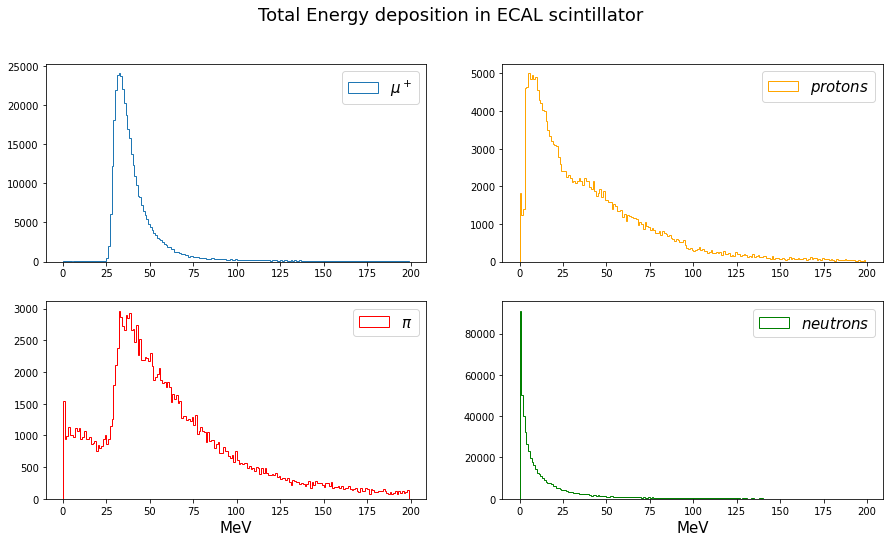

In [16]:
primaries__ = primaries_[primaries_.EDepECAL!=0]

fig, ax = plt.subplots(2,2,figsize=(15,8))

ax[0,0].hist(x = primaries__[primaries__.PDG==-13]['EDepECAL'], label=r'$\mu^+$',
        histtype='step', 
        bins=np.arange(0, 200, 1)
        )
ax[0,1].hist(x = primaries__[primaries__.PDG==2212]['EDepECAL'], label=r'$protons$',
        histtype='step', 
        bins=np.arange(0, 200, 1),
        color='orange'
        )
ax[1,1].hist(x = primaries__[primaries__.PDG==2112]['EDepECAL'], label=r'$neutrons$',
        histtype='step', 
        bins=np.arange(0, 200, 1),
        color='green'
        )
ax[1,0].hist(x = primaries__[(primaries__.PDG==111) | (primaries__.PDG==221) | (primaries__.PDG==-211)]['EDepECAL'], label=r'$\pi$',
        histtype='step', 
        bins=np.arange(0, 200, 1),
        color='red'
        )

# ax.set_yscale('log')
ax[0,0].legend(fontsize=15)

ax[0,1].legend(fontsize=15)

ax[1,0].legend(fontsize=15)
ax[1,0].set_xlabel("MeV", fontsize=15)

ax[1,1].legend(fontsize=15)
ax[1,1].set_xlabel("MeV", fontsize=15)

plt.suptitle("Total Energy deposition in ECAL scintillator", fontsize=18)
# ax.set_xlim(0,1)

Text(0.5, 0.98, 'Angle of emission')

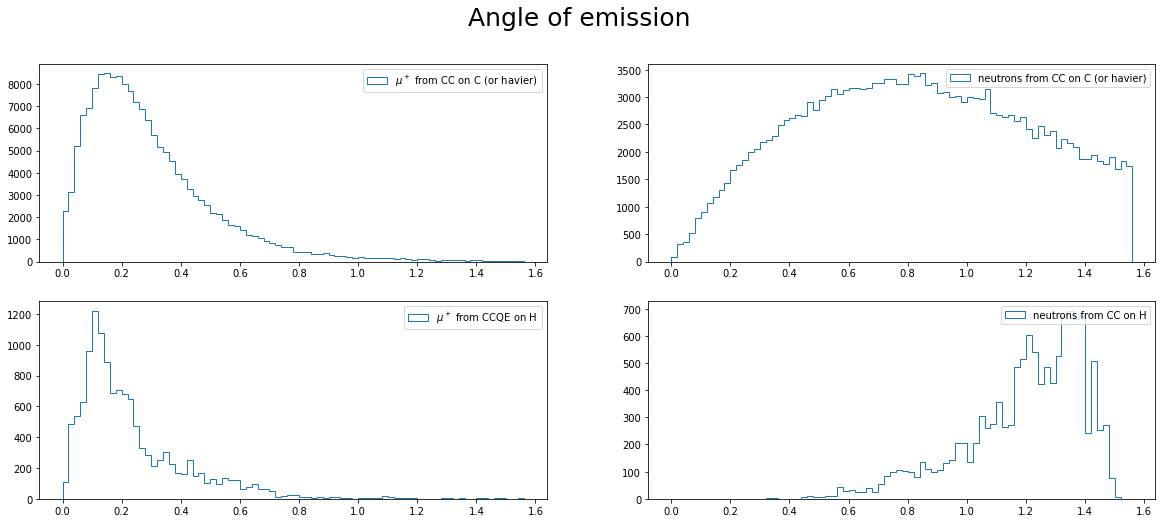

In [43]:
fig,ax = plt.subplots(2,2,figsize=(20,8))

ax[0,0].hist(x=primaries_bkg[(primaries_bkg.PDG==-13)]['EmissionAngle'], 
             histtype='step', bins=np.arange(0,np.pi/2.,0.02), label=r'$\mu^+$ from CC on C (or havier)')

ax[1,0].hist(x=primaries_signal[primaries_signal.PDG==-13]['EmissionAngle'], 
             histtype='step', bins=np.arange(0,np.pi/2.,0.02), label=r'$\mu^+$ from CCQE on H')

ax[0,1].hist(x=primaries_bkg[(primaries_bkg.PDG==2112)]['EmissionAngle'], 
             histtype='step', bins=np.arange(0,np.pi/2.,0.02), label='neutrons from CC on C (or havier)')

ax[1,1].hist(x=primaries_signal[(primaries_signal.PDG==2112)]['EmissionAngle'], 
             histtype='step', bins=np.arange(0,np.pi/2.,0.02), label='neutrons from CC on H')

ax[0,0].legend()
ax[0,1].legend()
ax[1,0].legend()
ax[1,1].legend()

plt.suptitle("Angle of emission", fontsize=25)

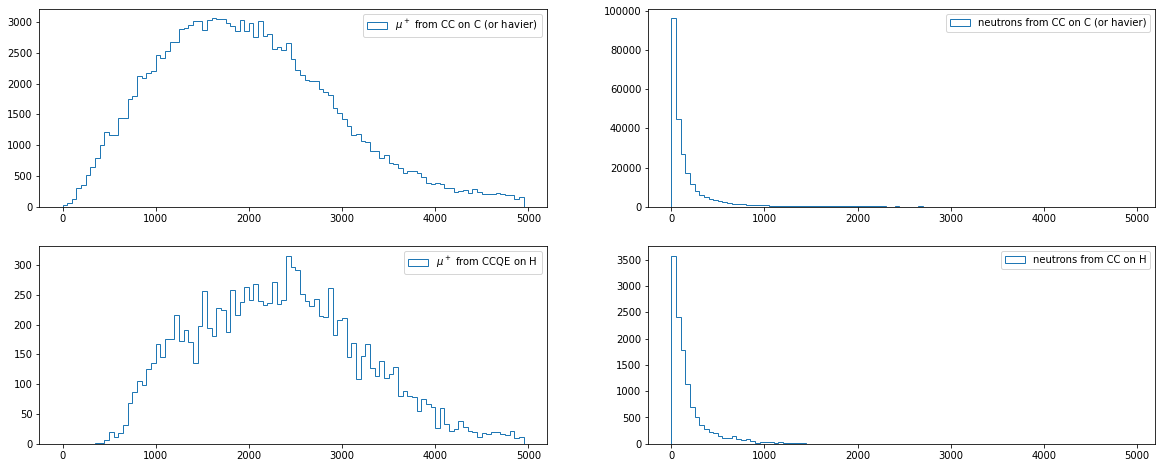

In [51]:
fig,ax = plt.subplots(1,2,figsize=(20,8))

ax[0].scatter(x = primaries_bkg[(primaries_bkg.PDG==-13)]['Ptot'],
              y = x=primaries_bkg[(primaries_bkg.PDG==2112)]['E_kin'],
              )

ax[0,0].hist(x=primaries_bkg[(primaries_bkg.PDG==-13)]['Ptot'], 
             histtype='step', bins=np.arange(0,5000,50), label=r'$\mu^+$ from CC on C (or havier)')

ax[1,0].hist(x=primaries_signal[primaries_signal.PDG==-13]['Ptot'], 
             histtype='step', bins=np.arange(0,5000,50), label=r'$\mu^+$ from CCQE on H')

ax[0,1].hist(x=primaries_bkg[(primaries_bkg.PDG==2112)]['E_kin'], 
             histtype='step', bins=np.arange(0,5000,50), label='neutrons from CC on C (or havier)')

ax[1,1].hist(x=primaries_signal[(primaries_signal.PDG==2112)]['E_kin'], 
             histtype='step', bins=np.arange(0,5000,50), label='neutrons from CC on H')

ax[0,0].legend()
ax[0,1].legend()
ax[1,0].legend()
ax[1,1].legend()

# plt.suptitle("Angle of emission", fontsize=25)

In [11]:
primaries_.loc[:, 'ECAL_entry_direction_x'] = primaries_['FirstHitECAL_X'] - primaries_['EvtVtxX'] * 1e3
primaries_.loc[:, 'ECAL_entry_direction_y'] = primaries_['FirstHitECAL_Y'] - primaries_['EvtVtxY'] * 1e3
primaries_.loc[:, 'ECAL_entry_direction_z'] = primaries_['FirstHitECAL_Z'] - primaries_['EvtVtxZ'] * 1e3

/home/NEUTRINO/gianfrancoingratta/.local/lib/python3.6/site-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/home/NEUTRINO/gianfrancoingratta/.local/lib/python3.6/site-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


In [12]:
primaries_["deviation_from_initial_direction"] = primaries_[['Px','Py','Pz',
                                                     'ECAL_entry_direction_x',
                                                     'ECAL_entry_direction_y',
                                                     'ECAL_entry_direction_z']].apply(calculate_deviation_angle, axis=1)

/home/NEUTRINO/gianfrancoingratta/.local/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


Text(0, 0.5, 'Deviation from initial direction [rad]')

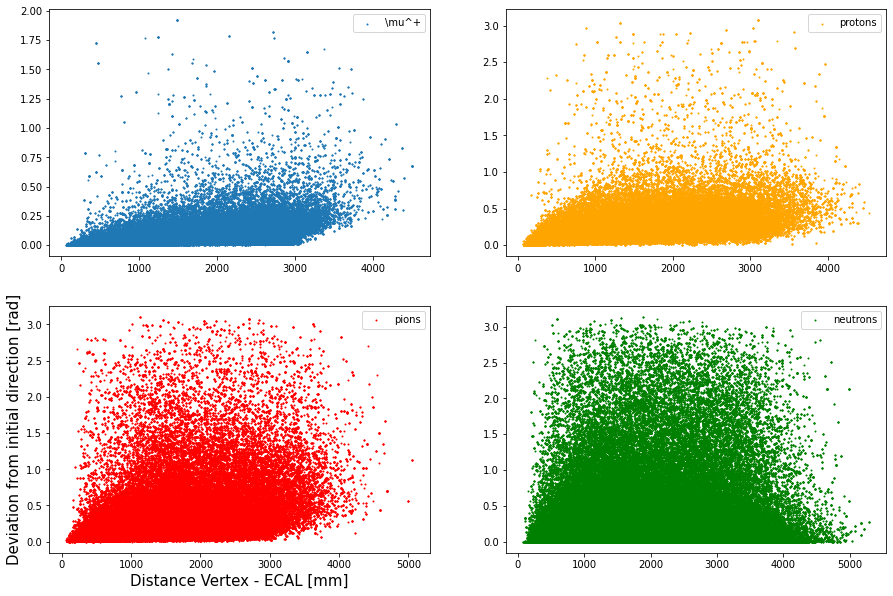

In [13]:
fig, ax = plt.subplots(2,2,figsize=(15,10))

ax[0,0].scatter(x = primaries_[primaries_.PDG==-13]['dist_Vtx2ECAL'], y = primaries_[primaries_.PDG==-13]['deviation_from_initial_direction'],
           s = 1, label = r'\mu^+')

ax[0,1].scatter(x = primaries_[primaries_.PDG==2212]['dist_Vtx2ECAL'], y = primaries_[primaries_.PDG==2212]['deviation_from_initial_direction'],
           s = 1, label = 'protons', color='orange')

ax[1,1].scatter(x = primaries_[primaries_.PDG==2112]['dist_Vtx2ECAL'], y = primaries_[primaries_.PDG==2112]['deviation_from_initial_direction'],
           s = 1, label = 'neutrons', color='green')

ax[1,0].scatter(x = primaries_[abs(primaries_.PDG)==211]['dist_Vtx2ECAL'], y = primaries_[abs(primaries_.PDG)==211]['deviation_from_initial_direction'],
           s = 1, label = 'pions', color='red')

ax[0,0].legend()
ax[0,1].legend()
ax[1,0].legend()
ax[1,1].legend()

ax[1,0].set_xlabel("Distance Vertex - ECAL [mm]", fontsize=15)
ax[1,0].set_ylabel("Deviation from initial direction [rad]", fontsize=15)

(-0.01, 0.2)

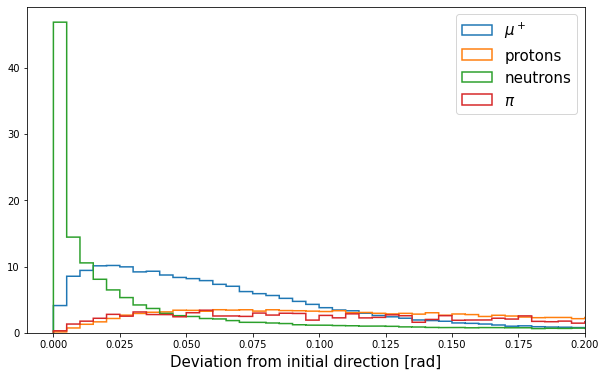

In [16]:
fig, ax = plt.subplots(figsize=(10,6))

ax.hist(x = primaries_[primaries_.PDG==-13]['deviation_from_initial_direction'], 
        histtype='step', bins=np.arange(0,np.pi,0.005), density=True, label=r'$\mu^+$', linewidth=1.5)

ax.hist(x = primaries_[primaries_.PDG==2212]['deviation_from_initial_direction'], 
        histtype='step', bins=np.arange(0,np.pi,0.005), density=True, label='protons', linewidth=1.5)

ax.hist(x = primaries_[primaries_.PDG==2112]['deviation_from_initial_direction'], 
        histtype='step', bins=np.arange(0,np.pi,0.005), density=True, label='neutrons', linewidth=1.5)

ax.hist(x = primaries_[abs(primaries_.PDG==211)]['deviation_from_initial_direction'], 
        histtype='step', bins=np.arange(0,np.pi,0.005), density=True, label=r'$\pi$', linewidth=1.5)

ax.set_xlabel("Deviation from initial direction [rad]", fontsize=15)
ax.legend(fontsize=15)
ax.set_xlim(-0.01,0.2)

In [17]:
df_ = df.set_index(['FileName'])

In [17]:
primaries_[(primaries_.CCQEonHydrogen==1)&(primaries_.PDG==2112)]

,,,,,,PDG,TrackId,Px,Py,Pz,E,EmissionAngle,FirstHitECAL_X,FirstHitECAL_Y,FirstHitECAL_Z,...,beta,CCQEonHydrogen,EvtVtxX,EvtVtxY,EvtVtxZ,dist_Vtx2ECAL,ECAL_entry_direction_x,ECAL_entry_direction_y,ECAL_entry_direction_z,deviation_from_initial_direction
FileName,EventId,entry,subentry,CCQEonHydrogen,EventType,,,,,,,,,,,,,,,,,,,,,
events-in-SANDtracker.0.gtrac.root:gRooTracker:152,152,635,1,1,QES,2112,1,19.443110,86.032049,17.435430,943.857303,1.472615,194.154990,-350.486025,23411.691052,...,0.095256,1,-0.049003,-1.363154,23.168014,1069.579843,243.158310,1012.667952,243.677443,3.707063e-02
events-in-SANDtracker.0.gtrac.root:gRooTracker:262,262,1272,1,1,QES,2112,1,-428.181055,115.121636,171.859851,1053.048375,1.230068,-1079.331867,-2567.022480,25996.951637,...,0.451574,1,0.216782,-2.915490,25.476783,1439.415352,-1296.114172,348.467299,520.168387,3.582244e-05
events-in-SANDtracker.0.gtrac.root:gRooTracker:285,285,1282,1,1,QES,2112,1,350.594578,953.615780,1348.621837,1932.320765,0.741813,1201.422286,-1301.432230,25704.650847,...,0.873827,1,0.718118,-2.713280,23.726107,2478.211089,483.304299,1411.847476,1978.543369,1.354974e-02
events-in-SANDtracker.0.gtrac.root:gRooTracker:309,309,1294,1,1,QES,2112,1,242.659829,-63.176597,42.433151,973.374909,1.375701,1873.724552,-1383.662226,24799.833570,...,0.261270,1,1.165807,-1.131116,24.746704,753.491617,707.917520,-252.546421,53.129149,1.305614e-01
events-in-SANDtracker.0.gtrac.root:gRooTracker:320,320,1299,1,1,QES,2112,1,27.211481,-283.376877,34.789512,982.362609,1.347993,1410.607173,-4390.535190,23773.061659,...,0.291947,1,1.225479,-2.462636,23.536378,1951.175816,185.128481,-1927.899256,236.683273,3.153981e-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
events-in-SANDtracker.99.gtrac.root:gRooTracker:921,921,31110,1,1,QES,2112,1,10.861551,-122.100812,3.738933,947.535554,1.440835,-273.076371,-4286.363079,24661.616724,...,0.129430,1,-0.463895,-2.229454,24.593634,2066.859305,190.818867,-2056.908833,67.982331,4.481467e-03
events-in-SANDtracker.99.gtrac.root:gRooTracker:939,939,31116,1,1,QES,2112,1,9.813086,416.614045,194.015722,1045.986962,1.236718,-86.803216,-917.497546,25391.705764,...,0.439470,1,-0.095580,-1.633387,25.111521,768.816388,8.777003,715.889787,280.184611,6.354967e-02
events-in-SANDtracker.99.gtrac.root:gRooTracker:94,94,29017,1,1,QES,2112,1,196.904222,173.560288,72.262560,978.212344,1.371145,1799.080467,-2806.744829,25330.957466,...,0.278307,1,0.743466,-3.727241,24.956375,1449.809030,1055.614107,920.496018,374.582649,8.954428e-03


In [22]:
df_[df_.CCQEonHydrogen==1]

,EventId,EventType,CCQEonHydrogen,NofEvents,PrimariesVertexX,PrimariesVertexY,PrimariesVertexZ,PrimariesVertexT,Neutrino_Px,Neutrino_Py,...,Expected_NuFromMu_E,Expected_HadronicSyst_Px,Expected_HadronicSyst_Py,Expected_HadronicSyst_Pz,Expected_HadronicSyst_E,Expected_NeutronFirstPosECAL_x,Expected_NeutronFirstPosECAL_y,Expected_NeutronFirstPosECAL_z,Expected_HadronicSyst_EmissionAngle,EmissionAngle_true_expected
FileName,,,,,,,,,,,,,,,,,,,,,
events-in-SANDtracker.3.gtrac.root:gRooTracker:66,66,QES,1,1,-0.351932,-3.283217,22.957713,1.534419e-09,-0.006018,-0.145310,...,1.452988,0.245827,0.577564,0.803769,1.386668,465.219996,-1363.336991,25629.522120,0.757516,0.000007
events-in-SANDtracker.3.gtrac.root:gRooTracker:70,70,QES,1,1,1.384662,-1.417615,23.791826,4.330035e-09,0.004976,-0.167659,...,1.700528,-0.483449,0.504887,0.822077,1.430817,689.290578,-691.407718,24974.264840,0.780353,0.000007
events-in-SANDtracker.3.gtrac.root:gRooTracker:90,90,QES,1,1,0.388691,-1.469573,23.901725,4.698432e-09,0.002197,-0.287569,...,2.913677,-0.207144,0.243631,0.105265,0.998067,-492.145710,-433.582213,24349.343047,1.329198,0.000020
events-in-SANDtracker.75.gtrac.root:gRooTracker:0,0,QES,1,1,-1.278945,-2.684207,23.206933,2.370229e-09,-0.007458,-0.254556,...,2.509531,0.086702,0.173172,0.050575,0.960653,-127.784739,-384.979331,23878.420520,1.407753,0.000033
events-in-SANDtracker.75.gtrac.root:gRooTracker:34,34,QES,1,1,-1.163031,-2.386962,23.936561,4.816159e-09,-0.003721,-0.175770,...,1.746180,0.230063,0.290376,0.163483,1.023116,210.002838,-653.976058,24912.242881,1.236313,0.000016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
events-in-SANDtracker.74.gtrac.root:gRooTracker:356,356,QES,1,1,0.551958,-0.715864,23.831425,4.462328e-09,0.000577,-0.107153,...,1.097346,-0.111417,0.512018,0.617568,1.240467,484.647118,-406.534451,24204.520578,0.799509,0.000009
events-in-SANDtracker.74.gtrac.root:gRooTracker:376,376,QES,1,1,-1.173202,-1.264430,23.758723,4.218009e-09,-0.010551,-0.224686,...,2.341528,-0.229107,-0.192903,0.051508,0.987495,-2862.028326,-2686.386914,24138.403727,1.335622,0.000022
events-in-SANDtracker.74.gtrac.root:gRooTracker:443,443,QES,1,1,-0.487198,-1.478012,24.486314,6.659219e-09,-0.001156,-0.235579,...,2.340624,-0.271600,0.041644,0.066355,0.981170,-2176.710842,-1218.959293,24899.082043,1.349805,0.000023


In [18]:
def calculate_tof_ns(distance_mm, beta):
    c = 3e8  # Velocità della luce in m/s
    distance_m = distance_mm / 1000  # Convertire la distanza da mm a metri
    tof_s = distance_m / (beta * c)  # Calcolare il tempo di volo in secondi
    tof_ns = tof_s * 1e9  # Convertire il tempo di volo in nanosecondi
    return tof_ns

In [34]:
primaries_.columns

Index(['PDG', 'TrackId', 'Px', 'Py', 'Pz', 'E', 'EmissionAngle',
       'FirstHitECAL_X', 'FirstHitECAL_Y', 'FirstHitECAL_Z', 'FirstHitECAL_T',
       'EDepECAL', 'mass', 'Ptot', 'E_kin', 'gamma', 'beta', 'CCQEonHydrogen',
       'EvtVtxX', 'EvtVtxY', 'EvtVtxZ', 'dist_Vtx2ECAL',
       'ECAL_entry_direction_x', 'ECAL_entry_direction_y',
       'ECAL_entry_direction_z', 'deviation_from_initial_direction'],
      dtype='object')

In [35]:
d = primaries_[(primaries_.CCQEonHydrogen==1) &(primaries_.PDG==2112)].join(df_, rsuffix='_')[
                                                                    [
                                                                     'FirstHitECAL_X',
                                                                     'FirstHitECAL_Y',
                                                                     'FirstHitECAL_Z',
                                                                     'FirstHitECAL_T',
                                                                     'Expected_NeutronFirstPosECAL_x',
                                                                     'Expected_NeutronFirstPosECAL_y',
                                                                     'Expected_NeutronFirstPosECAL_z',
                                                                     'beta',
                                                                     'E_kin',
                                                                     'dist_Vtx2ECAL',
                                                                     'deviation_from_initial_direction',
                                                                    ]]

d['Expected_NeutronFirstPosECAL_t'] = d.apply(lambda row: calculate_tof_ns(row['dist_Vtx2ECAL'], row['beta']), axis=1)
d

,,,,,,FirstHitECAL_X,FirstHitECAL_Y,FirstHitECAL_Z,FirstHitECAL_T,Expected_NeutronFirstPosECAL_x,Expected_NeutronFirstPosECAL_y,Expected_NeutronFirstPosECAL_z,beta,E_kin,dist_Vtx2ECAL,deviation_from_initial_direction,Expected_NeutronFirstPosECAL_t
FileName,EventId,EventType,entry,subentry,CCQEonHydrogen,,,,,,,,,,,,
events-in-SANDtracker.0.gtrac.root:gRooTracker:152,152,QES,635,1,1,194.154990,-350.486025,23411.691052,47.367294,154.051729,-464.680651,23350.169226,0.095256,4.291890,1069.579843,3.707063e-02,37.428301
events-in-SANDtracker.0.gtrac.root:gRooTracker:262,262,QES,1323,1,1,-1079.331867,-2567.022480,25996.951637,11.635044,-823.059095,-2635.917630,25894.163495,0.451574,113.482962,1439.415352,3.582244e-05,10.625180
events-in-SANDtracker.0.gtrac.root:gRooTracker:285,285,QES,1333,1,1,1201.422286,-1301.432230,25704.650847,17.789813,1213.374172,-1366.186614,25631.211600,0.873827,992.755352,2478.211089,1.354974e-02,9.453476
events-in-SANDtracker.0.gtrac.root:gRooTracker:309,309,QES,1345,1,1,1873.724552,-1383.662226,24799.833570,11.363654,2854.641224,-1570.809163,25042.071638,0.261270,33.809496,753.491617,1.305614e-01,9.613184
events-in-SANDtracker.0.gtrac.root:gRooTracker:320,320,QES,1350,1,1,1410.607173,-4390.535190,23773.061659,23.293625,1409.589931,-4379.949978,23771.807235,0.291947,42.797196,1951.175816,3.153981e-07,22.277721
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
events-in-SANDtracker.99.gtrac.root:gRooTracker:921,921,QES,104626,1,1,-273.076371,-4286.363079,24661.616724,54.382204,-284.987864,-4240.662639,24655.328141,0.129430,7.970141,2066.859305,4.481467e-03,53.229770
events-in-SANDtracker.99.gtrac.root:gRooTracker:939,939,QES,104632,1,1,-86.803216,-917.497546,25391.705764,14.858660,-81.559276,-1038.131555,25388.740216,0.439470,106.421549,768.816388,6.354967e-02,5.831391
events-in-SANDtracker.99.gtrac.root:gRooTracker:94,94,QES,102442,1,1,1799.080467,-2806.744829,25330.957466,18.402412,2432.722894,-2238.259957,25576.377828,0.278307,38.646931,1449.809030,8.954428e-03,17.364650


In [20]:
spatial_diff = np.sqrt((d['FirstHitECAL_X'] - d['Expected_NeutronFirstPosECAL_x'])**2 + 
                       (d['FirstHitECAL_Y'] - d['Expected_NeutronFirstPosECAL_y'])**2 + 
                       (d['FirstHitECAL_Z'] - d['Expected_NeutronFirstPosECAL_z'])**2)

Text(0.5, 1.0, 'Neutron ECAL Entry Time $\\overline{\\nu}+p\\rightarrow \\mu^+ + n$')

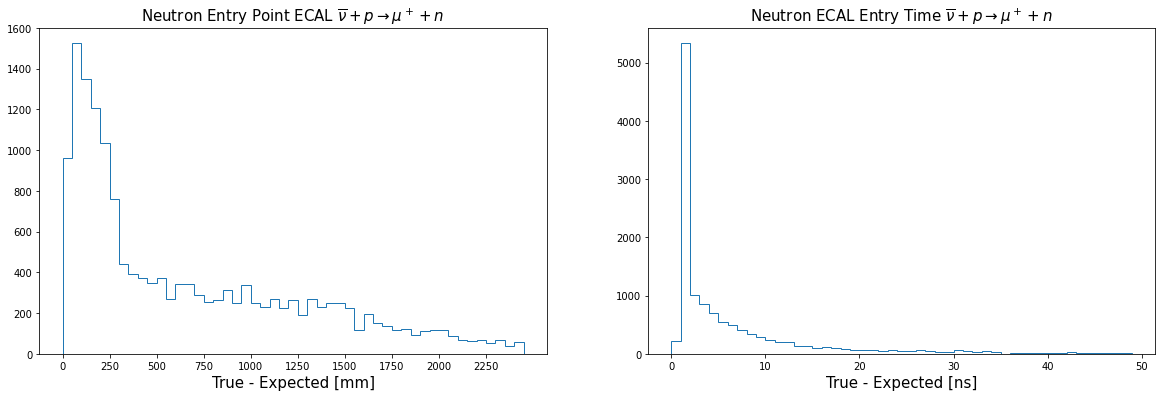

In [21]:
fig,ax = plt.subplots(1, 2, figsize=(20,6))

ax[0].hist(spatial_diff, histtype='step', bins=np.arange(0,2500,50))
ax[1].hist(d['FirstHitECAL_T'] - d['Expected_NeutronFirstPosECAL_t'], bins=np.arange(0,50,1), histtype='step')

ax[0].set_xlabel("True - Expected [mm]", fontsize=15)
ax[0].set_title(r"Neutron Entry Point ECAL $\overline{\nu}+p\rightarrow \mu^+ + n$", fontsize=15)
ax[0].set_xticks(np.arange(0,2500,250))

ax[1].set_xlabel("True - Expected [ns]", fontsize=15)
ax[1].set_title(r"Neutron ECAL Entry Time $\overline{\nu}+p\rightarrow \mu^+ + n$", fontsize=15)

Text(0, 0.5, 'beta neutron')

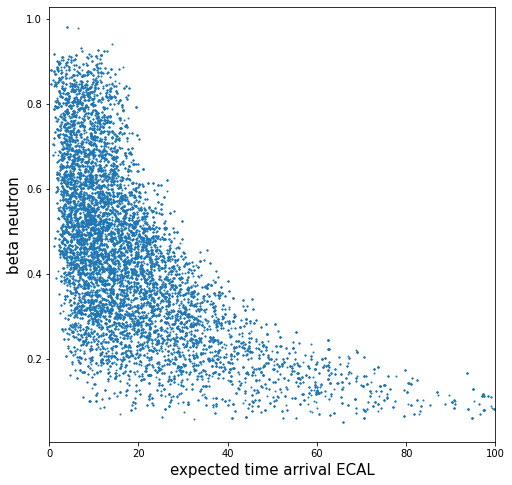

In [46]:
fig, ax = plt.subplots(figsize=(8,8))

ax.scatter(x = d['Expected_NeutronFirstPosECAL_t'], y = d['beta'], s=1)

plt.xlim([0,100])
# plt.ylim([0,500])

plt.xlabel("expected time arrival ECAL", fontsize=15)
plt.ylabel("beta neutron", fontsize=15)

(0.0, 0.25)

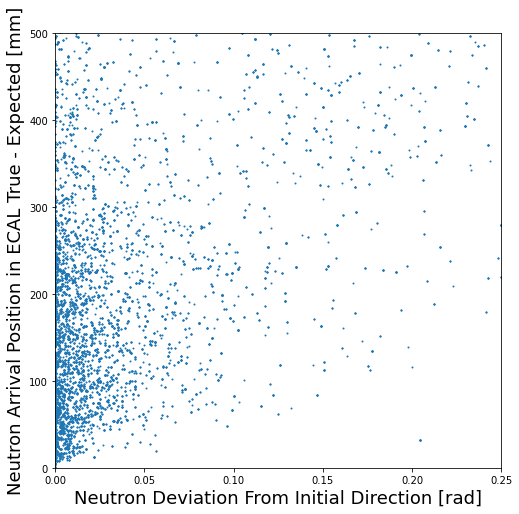

In [31]:
fig,ax = plt.subplots(figsize=(8,8))

ax.scatter(x = d['deviation_from_initial_direction'], y = spatial_diff, s=1)

ax.set_xlabel("Neutron Deviation From Initial Direction [rad]", fontsize=18)
ax.set_ylabel("Neutron Arrival Position in ECAL True - Expected [mm]", fontsize=18)

ax.set_ylim(0,500)
ax.set_xlim(0,0.25)

In [56]:
d.columns

Index(['FirstHitECAL_X', 'FirstHitECAL_Y', 'FirstHitECAL_Z', 'FirstHitECAL_T',
       'Expected_NeutronFirstPosECAL_x', 'Expected_NeutronFirstPosECAL_y',
       'Expected_NeutronFirstPosECAL_z', 'beta', 'dist_Vtx2ECAL',
       'deviation_from_initial_direction', 'Expected_NeutronFirstPosECAL_t'],
      dtype='object')

In [23]:
import ROOT as r
import math

Welcome to JupyROOT 6.20/00


In [ ]:
geo = r.TGeoManager.Import('/storage/gpfs_data/neutrino/users/gi/dunendggd/SAND_opt3_DRIFT1.root')

In [69]:
SAND_CENTER_Y = -2384.73
SAND_CENTER_Z = 23910.

def get_ECAL_module_number(x,y,z):
    # input in mm
    name = geo.FindNode(x*10,y*10,z*10)
    path = geo.GetPath()
    if "endvolECAL" in path:
        mod_number = 24
    angle = math.atan2(z - SAND_CENTER_Z, y - SAND_CENTER_Y)
    module_size = 2*np.pi / 24
    if angle < 0:
        angle += 2 * math.pi
    mod_number = int(angle/module_size)
    # print(f"z: {z}, y: {y}, math.atan2(z, y), {math.atan2(z, y)}, angle: {angle}, mod_number: {mod_number}")
    if mod_number == 24:
        return 0
    else:
        return mod_number


In [25]:
d["FirstHitECAL_Module"] = d.apply(lambda row: get_ECAL_module_number(row['FirstHitECAL_X'],
                                                                      row['FirstHitECAL_Y'], 
                                                                      row['FirstHitECAL_Z']), axis=1)
d['Expected_NeutronFirstPosECAL_Module'] = d.apply(lambda row: get_ECAL_module_number(row['Expected_NeutronFirstPosECAL_x'],
                                                                                      row['Expected_NeutronFirstPosECAL_y'],
                                                                                      row['Expected_NeutronFirstPosECAL_z']), axis=1)

No handles with labels found to put in legend.


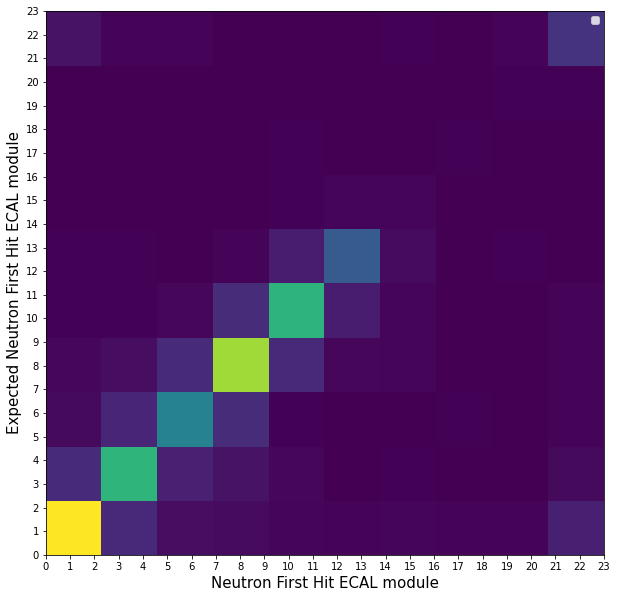

In [28]:
fig,ax = plt.subplots(figsize=(10,10))

ax.hist2d(x = d["FirstHitECAL_Module"], y = d['Expected_NeutronFirstPosECAL_Module'])

plt.xticks(range(24))
plt.yticks(range(24))

plt.xlabel("Neutron First Hit ECAL module", fontsize = 15)
plt.ylabel("Expected Neutron First Hit ECAL module", fontsize = 15)

plt.legend()

# PURITY AND EFFICIENCY OF SIGNAL CHANNEL

In [38]:
total_signal = len(df[df.CCQEonHydrogen==1])

df_1cp = df[df.NofFinalStateChargedParticles==1]

df_null_transverse_mometum = df_1cp[df_1cp.MissingTransverseMomentum < 1e-4]

print(f"cut - 1 final state charged particle - nof signal events : {len(df_1cp[df_1cp.CCQEonHydrogen==1])}, "+
                                                      f"efficiency : {len(df_1cp[df_1cp.CCQEonHydrogen==1])/total_signal}, "+
                                                          f"purity : {len(df_1cp[df_1cp.CCQEonHydrogen==1])/len(df_1cp)}")

print(f"cut - 0 missing transverse momentum - nof signal events : {len(df_null_transverse_mometum[df_null_transverse_mometum.CCQEonHydrogen==1])}, "+
                                                     f"efficiency : {len(df_null_transverse_mometum[df_null_transverse_mometum.CCQEonHydrogen==1])/total_signal}, "+
                                                         f"purity : {len(df_null_transverse_mometum[df_null_transverse_mometum.CCQEonHydrogen==1])/len(df_null_transverse_mometum)}")

# df_null_transverse_mometum_primaries = df_null_transverse_mometum.set_index(['FileName','CCQEonHydrogen']).join(primaries, how='left')

# df_null_transverse_mometum_primaries

cut - 1 final state charged particle - nof signal events : 27420, efficiency : 1.0, purity : 0.20192350177474705
cut - 0 missing transverse momentum - nof signal events : 27420, efficiency : 1.0, purity : 0.7278808632635183


In [39]:
# df_null_transverse_mometum_primaries.columns

In [40]:
df_null_transverse_mometum.columns

Index(['FileName', 'EventId', 'EventType', 'CCQEonHydrogen', 'NofEvents',
       'PrimariesVertexX', 'PrimariesVertexY', 'PrimariesVertexZ',
       'PrimariesVertexT', 'Neutrino_Px', 'Neutrino_Py', 'Neutrino_Pz',
       'Neutrino_E', 'Lepton_Px', 'Lepton_Py', 'Lepton_Pz', 'Lepton_E',
       'Lepton_EmissionAngle', 'HadronicSyst_Px', 'HadronicSyst_Py',
       'HadronicSyst_Pz', 'HadronicSyst_E', 'HadronicSyst_EmissionAngle',
       'HadronicSyst_KinE', 'NofPrimaries', 'NofFinalStateChargedParticles',
       'Expected_NuFromMu_Px', 'Expected_NuFromMu_Py', 'Expected_NuFromMu_Pz',
       'Expected_NuFromMu_E', 'MissingTransverseMomentum',
       'Expected_HadronicSyst_Px', 'Expected_HadronicSyst_Py',
       'Expected_HadronicSyst_Pz', 'Expected_HadronicSyst_E',
       'Expected_NeutronFirstPosECAL_x', 'Expected_NeutronFirstPosECAL_y',
       'Expected_NeutronFirstPosECAL_z', 'Expected_HadronicSyst_EmissionAngle',
       'EmissionAngle_true_expected'],
      dtype='object')

In [45]:
df_null_transverse_mometum = df_null_transverse_mometum.set_index(['FileName', 'EventId', 'EventType', 'CCQEonHydrogen'])
df_null_transverse_mometum

,,,,NofEvents,PrimariesVertexX,PrimariesVertexY,PrimariesVertexZ,PrimariesVertexT,Neutrino_Px,Neutrino_Py,Neutrino_Pz,Neutrino_E,Lepton_Px,...,MissingTransverseMomentum,Expected_HadronicSyst_Px,Expected_HadronicSyst_Py,Expected_HadronicSyst_Pz,Expected_HadronicSyst_E,Expected_NeutronFirstPosECAL_x,Expected_NeutronFirstPosECAL_y,Expected_NeutronFirstPosECAL_z,Expected_HadronicSyst_EmissionAngle,EmissionAngle_true_expected
FileName,EventId,EventType,CCQEonHydrogen,,,,,,,,,,,,,,,,,,,,,
events-in-SANDtracker.468.gtrac.root:gRooTracker:17,17,QES,1,1,-0.794210,-1.913855,25.324435,9.467206e-09,-0.002939,-0.287417,2.897841,2.912061,0.206326,...,2.012279e-16,-0.209265,-0.112271,0.031838,0.969640,-2483.415525,-2820.111877,25581.436827,1.390462,0.000027
events-in-SANDtracker.468.gtrac.root:gRooTracker:47,47,QES,1,1,1.410296,-1.785823,23.172343,2.253894e-09,0.009568,-0.336276,3.350522,3.367369,0.086547,...,2.081668e-16,-0.076980,-0.290795,0.035184,0.987176,734.625915,-4338.212906,23481.159079,1.358453,0.000022
events-in-SANDtracker.468.gtrac.root:gRooTracker:52,52,RES,0,1,-0.643563,-3.550556,24.486678,6.662810e-09,-0.000747,-0.110045,1.051501,1.057244,-0.035228,...,6.429323e-09,0.035097,0.088228,0.107584,0.950464,-179.231107,-2383.314324,25909.999499,0.820977,0.713186
events-in-SANDtracker.468.gtrac.root:gRooTracker:65,65,QES,1,1,1.431523,-3.324724,24.416507,6.425859e-09,0.001906,-0.132369,1.295265,1.302012,-0.104881,...,1.665335e-16,0.106787,0.356917,0.198370,1.030017,3120.091358,2319.009513,27553.218892,1.178885,0.000016
events-in-SANDtracker.468.gtrac.root:gRooTracker:92,92,RES,0,1,0.687500,-2.377702,25.720202,1.079380e-08,0.004660,-0.151331,1.526068,1.533560,-0.024089,...,2.220717e-16,0.025676,-0.228543,0.075500,0.970249,736.324222,-2812.277937,25863.766302,1.155042,0.957946
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
events-in-SANDtracker.958.gtrac.root:gRooTracker:646,646,RES,0,1,-0.251249,-1.954594,24.160025,5.564065e-09,-0.001761,-0.261574,2.645142,2.658044,0.673737,...,2.775558e-16,-0.674918,-0.450555,0.718081,1.434206,-1940.997698,-3082.620491,25957.837123,0.794271,0.352544
events-in-SANDtracker.982.gtrac.root:gRooTracker:875,875,RES,0,1,-0.402720,-0.734727,24.451771,6.541493e-09,-0.000827,-0.267613,2.725357,2.738465,0.332110,...,8.950904e-16,-0.332844,0.532399,0.432335,1.209934,-538.230359,-517.972723,24627.786366,1.051474,0.284355
events-in-SANDtracker.982.gtrac.root:gRooTracker:910,910,QES,1,1,0.635066,-2.741794,25.545591,1.021117e-08,0.004386,-0.198250,1.947501,1.957571,0.382996,...,5.855045e-16,-0.378610,-0.291153,0.164507,1.066757,128.876521,-3131.056840,25765.531258,1.180271,0.000013


In [49]:
# df_null_transverse_mometum[df_null_transverse_mometum.index.get_level_values(3)==1]

In [52]:
df_null_transverse_mometum_primaries = df_null_transverse_mometum.join(primaries[], how='left')
df_null_transverse_mometum_primaries

NofEvents  \
FileName                                           EventId EventType CCQEonHydrogen subentry entry               
events-in-SANDtracker.0.gtrac.root:gRooTracker:152 152     QES       1              0        647             1   
                                                                                    1        647             1   
events-in-SANDtracker.0.gtrac.root:gRooTracker:223 223     RES       0              0        1264            1   
                                                                                    1        1264            1   
                                                                                    2        1264            1   
...                                                                                                        ...   
events-in-SANDtracker.998.gtrac.root:gRooTracke... 878     QES       1              1        377703          1   
events-in-SANDtracker.998.gtrac.root:gRooTracke... 926     QES       1              0        377920          1   
                                                                                    1        377920          1   
events-in-SANDtracker.998.gtrac.root:gRooTracke... 942     QES       1              0        377925          1   
                                                                                    1        377925          1   

                                                                                                     PrimariesVertexX  \
FileName                                           EventId EventType CCQEonHydrogen subentry entry                      
events-in-SANDtracker.0.gtrac.root:gRooTracker:152 152     QES       1              0        647            -0.049003   
                                                                                    1        647            -0.049003   
events-in-SANDtracker.0.gtrac.root:gRooTracker:223 223     RES       0              0        1264           -0.550080   
                                                                                    1        1264           -0.550080   
                                                                                    2        1264           -0.550080   
...                                                                                                               ...   
events-in-SANDtracker.998.gtrac.root:gRooTracke... 878     QES       1              1        377703         -1.352936   
events-in-SANDtracker.998.gtrac.root:gRooTracke... 926     QES       1              0        377920          1.524694   
                                                                                    1        377920          1.524694   
events-in-SANDtracker.998.gtrac.root:gRooTracke... 942     QES       1              0        377925          0.527259   
                                                                                    1        377925          0.527259   

                                                                                                     PrimariesVertexY  \
FileName                                           EventId EventType CCQEonHydrogen subentry entry                      
events-in-SANDtracker.0.gtrac.root:gRooTracker:152 152     QES       1              0        647            -1.363154   
                                                                                    1        647            -1.363154   
events-in-SANDtracker.0.gtrac.root:gRooTracker:223 223     RES       0              0        1264           -1.887966   
                                                                                    1        1264           -1.887966   
                                                                                    2        1264           -1.887966   
...                                                                                                               ...   
events-in-SANDtracker.998.gtrac.root:gRooTracke... 878     QES       1      

In [53]:
df_null_transverse_mometum_primaries.columns

Index(['NofEvents', 'PrimariesVertexX', 'PrimariesVertexY', 'PrimariesVertexZ',
       'PrimariesVertexT', 'Neutrino_Px', 'Neutrino_Py', 'Neutrino_Pz',
       'Neutrino_E', 'Lepton_Px', 'Lepton_Py', 'Lepton_Pz', 'Lepton_E',
       'Lepton_EmissionAngle', 'HadronicSyst_Px', 'HadronicSyst_Py',
       'HadronicSyst_Pz', 'HadronicSyst_E', 'HadronicSyst_EmissionAngle',
       'HadronicSyst_KinE', 'NofPrimaries', 'NofFinalStateChargedParticles',
       'Expected_NuFromMu_Px', 'Expected_NuFromMu_Py', 'Expected_NuFromMu_Pz',
       'Expected_NuFromMu_E', 'MissingTransverseMomentum',
       'Expected_HadronicSyst_Px', 'Expected_HadronicSyst_Py',
       'Expected_HadronicSyst_Pz', 'Expected_HadronicSyst_E',
       'Expected_NeutronFirstPosECAL_x', 'Expected_NeutronFirstPosECAL_y',
       'Expected_NeutronFirstPosECAL_z', 'Expected_HadronicSyst_EmissionAngle',
       'EmissionAngle_true_expected', 'PDG', 'TrackId', 'Px', 'Py', 'Pz', 'E',
       'EmissionAngle', 'FirstHitECAL_X', 'FirstHitECAL_Y',

In [57]:
df_null_transverse_mometum_primaries[['FirstHitECAL_X','FirstHitECAL_Y','FirstHitECAL_Z']]

FirstHitECAL_X  \
FileName                                           EventId EventType CCQEonHydrogen subentry entry                    
events-in-SANDtracker.0.gtrac.root:gRooTracker:152 152     QES       1              0        647         -66.458024   
                                                                                    1        647         194.154990   
events-in-SANDtracker.0.gtrac.root:gRooTracker:223 223     RES       0              0        1264       -503.904984   
                                                                                    1        1264       -344.118243   
                                                                                    2        1264       1703.550000   
...                                                                                                             ...   
events-in-SANDtracker.998.gtrac.root:gRooTracke... 878     QES       1              1        377703     1026.628577   
events-in-SANDtracker.998.gtrac.root:gRooTracke... 926     QES       1              0        377920     1549.567309   
                                                                                    1        377920     -318.255980   
events-in-SANDtracker.998.gtrac.root:gRooTracke... 942     QES       1              0        377925      544.863857   
                                                                                    1        377925     -435.270442   

                                                                                                     FirstHitECAL_Y  \
FileName                                           EventId EventType CCQEonHydrogen subentry entry                    
events-in-SANDtracker.0.gtrac.root:gRooTracker:152 152     QES       1              0        647       -1496.269280   
                                                                                    1        647        -350.486025   
events-in-SANDtracker.0.gtrac.root:gRooTracker:223 223     RES       0              0        1264      -2038.281759   
                                                                                    1        1264      -3675.268636   
                                                                                    2        1264      -3443.435364   
...                                                                                                             ...   
events-in-SANDtracker.998.gtrac.root:gRooTracke... 878     QES       1              1        377703    -4499.932392   
events-in-SANDtracker.998.gtrac.root:gRooTracke... 926     QES       1              0        377920    -2866.323447   
                                                                                    1        377920    -1885.746748   
events-in-SANDtracker.998.gtrac.root:gRooTracke... 942     QES       1              0        377925     -970.900865   
                                                                                    1        377925     -446.140442   

                                                                                                     FirstHitECAL_Z  
FileName                                           EventId EventType CCQEonHydrogen subentry entry                   
events-in-SANDtracker.0.gtrac.root:gRooTracker:152 152     QES       1              0        647       25706.852186  
                                                                                    1        647       23411.691052  
events-in-SANDtracker.0.gtrac.root:gRooTracker:223 223     RES       0              0        1264      25888.084181  
                                                                                    1        1264      25560.157739  
                                                                                    2        1264      23242.240376  
...                                                                                                             ...  
events-in-SANDtracker.998.gtrac.root:gRooTracke... 878     QE

In [72]:
df_null_transverse_mometum_primaries["FirstHitECAL_Module"] = df_null_transverse_mometum_primaries.apply(lambda row: get_ECAL_module_number(row['FirstHitECAL_X'],
                                                                      row['FirstHitECAL_Y'], 
                                                                      row['FirstHitECAL_Z']), axis=1)

In [73]:
df_null_transverse_mometum_primaries['Expected_NeutronFirstPosECAL_Module'] = df_null_transverse_mometum_primaries.apply(lambda row: get_ECAL_module_number(row['Expected_NeutronFirstPosECAL_x'],
                                                                                      row['Expected_NeutronFirstPosECAL_y'],
                                                                                      row['Expected_NeutronFirstPosECAL_z']), axis=1)

In [82]:
df_null_transverse_mometum_primaries['neutron_ECAL_module_diff'] = df_null_transverse_mometum_primaries["FirstHitECAL_Module"] - df_null_transverse_mometum_primaries['Expected_NeutronFirstPosECAL_Module']

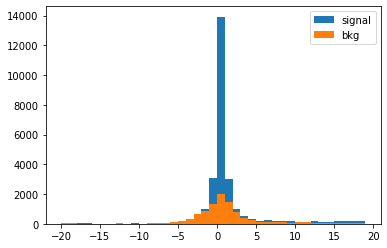

In [90]:
fig,ax = plt.subplots()

ax.hist(x = df_null_transverse_mometum_primaries[(df_null_transverse_mometum_primaries.CCQEonHydrogen==1)&
                                                 (df_null_transverse_mometum_primaries.PDG==2112)]['neutron_ECAL_module_diff'], bins=np.arange(-20,20) , label='signal')
ax.hist(x = df_null_transverse_mometum_primaries[(df_null_transverse_mometum_primaries.CCQEonHydrogen==0)&
                                                 (df_null_transverse_mometum_primaries.PDG==2112)]['neutron_ECAL_module_diff'],  bins=np.arange(-20,20) , label='bkg')

plt.legend()

In [88]:
df_null_transverse_mometum_primaries[df_null_transverse_mometum_primaries.PDG==2112]

,,,,,,NofEvents,PrimariesVertexX,PrimariesVertexY,PrimariesVertexZ,PrimariesVertexT,Neutrino_Px,Neutrino_Py,Neutrino_Pz,Neutrino_E,Lepton_Px,...,gamma,beta,CCQEonHydrogen,EvtVtxX,EvtVtxY,EvtVtxZ,dist_Vtx2ECAL,FirstHitECAL_Module,Expected_NeutronFirstPosECAL_Module,neutron_ECAL_module_diff
FileName,EventId,EventType,CCQEonHydrogen,subentry,entry,,,,,,,,,,,,,,,,,,,,,
events-in-SANDtracker.0.gtrac.root:gRooTracker:152,152,QES,1,1,647,1,-0.049003,-1.363154,23.168014,2.239188e-09,-0.002373,-0.294813,2.961925,2.976562,-0.021817,...,1.004568,0.095256,1,-0.049003,-1.363154,23.168014,1069.579843,23,22,1
events-in-SANDtracker.0.gtrac.root:gRooTracker:223,223,RES,0,1,1264,1,-0.550080,-1.887966,23.427004,3.107594e-09,0.007260,-2.202814,21.937720,22.048038,0.390798,...,1.365901,0.681179,0,-0.550080,-1.887966,23.427004,2790.558527,8,11,-3
events-in-SANDtracker.0.gtrac.root:gRooTracker:249,249,QES,1,1,1274,1,-0.252206,-3.621905,23.429059,3.116014e-09,-0.004538,-0.157301,1.495335,1.503593,-0.661657,...,1.409323,0.704644,1,-0.252206,-3.621905,23.429059,23708.703212,18,10,8
events-in-SANDtracker.0.gtrac.root:gRooTracker:262,262,QES,1,1,1278,1,0.216782,-2.915490,25.476783,9.980749e-09,0.002195,-0.257874,2.525994,2.539124,0.430376,...,1.120782,0.451574,1,0.216782,-2.915490,25.476783,1439.415352,6,6,0
events-in-SANDtracker.0.gtrac.root:gRooTracker:285,285,QES,1,1,1288,1,0.718118,-2.713280,23.726107,4.110819e-09,-0.003675,-0.378103,3.717081,3.736264,-0.354270,...,2.056611,0.873827,1,0.718118,-2.713280,23.726107,2478.211089,3,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
events-in-SANDtracker.998.gtrac.root:gRooTracker:808,808,QES,1,1,377675,1,-0.018411,-2.688733,24.559283,6.905966e-09,0.001724,-0.105776,1.015472,1.020967,0.083140,...,1.009830,0.139187,1,-0.018411,-2.688733,24.559283,2487.078035,2,2,0
events-in-SANDtracker.998.gtrac.root:gRooTracker:87,87,DIS,0,1,376877,1,1.106334,-1.314434,23.360165,2.883030e-09,0.004904,-0.329542,3.341038,3.357254,-0.537673,...,1.396489,0.698017,0,1.106334,-1.314434,23.360165,1549.947994,1,1,0
events-in-SANDtracker.998.gtrac.root:gRooTracker:878,878,QES,1,1,377703,1,-1.352936,-3.108521,23.168366,2.241730e-09,-0.006746,-0.166485,1.578981,1.587748,-0.477567,...,1.191342,0.543531,1,-1.352936,-3.108521,23.168366,3065.764159,10,11,-1


In [92]:
df_last_cut = df_null_transverse_mometum_primaries[abs(df_null_transverse_mometum_primaries.neutron_ECAL_module_diff)==1]
df_last_cut

NofEvents  \
FileName                                           EventId EventType CCQEonHydrogen subentry entry               
events-in-SANDtracker.0.gtrac.root:gRooTracker:152 152     QES       1              1        647             1   
events-in-SANDtracker.0.gtrac.root:gRooTracker:262 262     QES       1              0        1278            1   
events-in-SANDtracker.0.gtrac.root:gRooTracker:309 309     QES       1              1        1300            1   
events-in-SANDtracker.0.gtrac.root:gRooTracker:480 480     QES       1              1        2327            1   
events-in-SANDtracker.0.gtrac.root:gRooTracker:613 613     QES       1              0        2385            1   
...                                                                                                        ...   
events-in-SANDtracker.998.gtrac.root:gRooTracke... 878     QES       1              0        377703          1   
                                                                                    1        377703          1   
events-in-SANDtracker.998.gtrac.root:gRooTracke... 926     QES       1              0        377920          1   
events-in-SANDtracker.998.gtrac.root:gRooTracke... 942     QES       1              0        377925          1   
                                                                                    1        377925          1   

                                                                                                     PrimariesVertexX  \
FileName                                           EventId EventType CCQEonHydrogen subentry entry                      
events-in-SANDtracker.0.gtrac.root:gRooTracker:152 152     QES       1              1        647            -0.049003   
events-in-SANDtracker.0.gtrac.root:gRooTracker:262 262     QES       1              0        1278            0.216782   
events-in-SANDtracker.0.gtrac.root:gRooTracker:309 309     QES       1              1        1300            1.165807   
events-in-SANDtracker.0.gtrac.root:gRooTracker:480 480     QES       1              1        2327            1.012217   
events-in-SANDtracker.0.gtrac.root:gRooTracker:613 613     QES       1              0        2385           -0.530326   
...                                                                                                               ...   
events-in-SANDtracker.998.gtrac.root:gRooTracke... 878     QES       1              0        377703         -1.352936   
                                                                                    1        377703         -1.352936   
events-in-SANDtracker.998.gtrac.root:gRooTracke... 926     QES       1              0        377920          1.524694   
events-in-SANDtracker.998.gtrac.root:gRooTracke... 942     QES       1              0        377925          0.527259   
                                                                                    1        377925          0.527259   

                                                                                                     PrimariesVertexY  \
FileName                                           EventId EventType CCQEonHydrogen subentry entry                      
events-in-SANDtracker.0.gtrac.root:gRooTracker:152 152     QES       1              1        647            -1.363154   
events-in-SANDtracker.0.gtrac.root:gRooTracker:262 262     QES       1              0        1278           -2.915490   
events-in-SANDtracker.0.gtrac.root:gRooTracker:309 309     QES       1              1        1300           -1.131116   
events-in-SANDtracker.0.gtrac.root:gRooTracker:480 480     QES       1              1        2327           -3.784073   
events-in-SANDtracker.0.gtrac.root:gRooTracker:613 613     QES       1              0        2385           -1.849274   
...                                                                                                               ...   
events-in-SANDtracker.998.gtrac.root:gRooTracke... 878     QES       1      

In [98]:
df_last_cut.index.get_level_values(3)

Int64Index([1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
            ...
            1, 1, 0, 0, 0, 1, 1, 1, 1, 1],
           dtype='int64', name='CCQEonHydrogen', length=15416)

In [99]:
len(df_last_cut.index.get_level_values(3))

15416

In [100]:
np.sum(df_last_cut.index.get_level_values(3))

10846

In [101]:
print(f"cut - 1 final state charged particle - nof signal events : {np.sum(df_last_cut.index.get_level_values(3))}, "+
                                                      f"efficiency : {np.sum(df_last_cut.index.get_level_values(3))/total_signal}, "+
                                                          f"purity : {np.sum(df_last_cut.index.get_level_values(3))/len(df_last_cut.index.get_level_values(3))}")

cut - 1 final state charged particle - nof signal events : 10846, efficiency : 0.3955506929248724, purity : 0.7035547483134406
